# Модель для прогнозирования оттока клиентов для сервиса доставки кофе

<a id='1-bullet'></a>

# План работы

____    
    
**Название проекта**

Модель для прогнозирования оттока клиентов для сервиса доставки кофе
_____
**Описание исследования**

Клиент Happy Beans Coffee столкнулся с ежемесячным оттоком 10% пользовательской базы после запуска сервиса доставки. Учитывая, что привлечение новых покупателей обходится в 5–7 раз дороже удержания, текущие маркетинговые затраты не окупаются. Цель проекта - разработка модели прогнозирования оттока клиентов (churn prediction) для сохранения выручки и оптимизации бюджета.
_____
**Цель исследования**

- Построить модель бинарной классификации, которая спрогнозирует вероятность оттока каждого клиента в следующем месяце.
- Целевая переменная: churn (перестал ли пользователь пользоваться сервисом).
- В качестве метрики будет использоваться: Precision-Recall AUC (PR AUC). Она фокусируется на корректном предсказании меньшего по объёму, но ключевого для задачи класса - уходящих клиентов.
- Решение должно быть готово к промышленной эксплуатации, поэтому будет сохранен воспроизводимый Pipeline модели.
_____
**Задачи исследования**

- Подготовить среды и библиотеки.
- Провести исследовательский анализ данных (EDA).
- Предобработать данные.
- Обучить и оценить базовые модели.
- Создать и отобрать новые признаки.
- Подобрать гиперпараметры модели.
- Финальное обучение модели и подготовка артефактов.

_____
**Исходные данные**

- user_id — идентификатор пользователя.
- days_since_last_order — количество дней, прошедших с последнего заказа.
- order_frequency_month — среднее число заказов в месяц.
- order_frequency_week — среднее число заказов в неделю.
- avg_order_value — средний чек, в рублях.
- median_order_value — медианный чек, в рублях.
- total_spent_last_month — сумма заказов за последний месяц.
- total_spent_last_week — сумма заказов за последнюю неделю.
- discount_usage_rate — доля заказов со скидкой за последний месяц.
- last_coffee_type — сорт кофе, купленный пользователем в последний раз на момент сбора данных.
- preferred_roast — предпочитаемый тип обжарки.
- milk_preference — предпочитаемый тип молока.
- seasonal_menu_tried — отметка о том, пробовал ли пользователь новейшее сезонное меню.
- coffee_bean_origin — страна происхождения зерна.
- last_drink_size — размер последнего заказа, совершённого на момент сбора данных.
- subscription_status — тип подписки пользователя.
- app_opens_per_week — сколько раз за неделю пользователь в среднем открывал приложение доставки кофе.
- notifications_enabled — включены ли у пользователя уведомления.
- review_rating_last_10 — средняя оценка последних на момент сбора данных десяти заказов клиента.
- review_rating_last_1 — оценка последнего на момент сбора данных заказа клиента.
- app_crashes_last_month — сколько раз приложение зависало за последний месяц.
- seasons — текущее время года.
- days_since_last_promo — сколько дней прошло с последнего использования акции или промокода.
- phone_type — тип устройства, с которого пользователь чаще всего совершал покупки.
- coffee_preference_change — менялись ли вкусовые предпочтения пользователя.
- geo_id — идентификатор региона пользователя.
- churn — перестал ли пользователь пользоваться сервисом.
______

**Данное исследование разделим на несколько частей**

***Часть 0. Постановка задачи машинного обучения:***
* [1. Формулировка задачи](#1-bullet)

***Часть 1. Подключение, настройка библиотек и загрузка датасета:***
* [1. Загрузка и импорт библиотек](#2-bullet)
* [2. Фиксация глобальных констант](#3-bullet)
* [3. Извлечение данных из датасета](#4-bullet)

***Часть 2. Первичный анализ данных***
* [1. Анализ данных пользователей и их вовлеченности](#5-bullet)
* [2. Обработка некорректных типов и понижение размерности pandas датасета](#6-bullet)
* [3. Вывод по данными датасета](#7-bullet)
* [4. Анализ целевой переменной](#8-bullet)
* [5. Удаление признаков](#9-bullet)
* [6. Удаление явных дубликатов](#10-bullet)
* [7. Обработка пропусков](#11-bullet)
* [8. Анализ категориальных признаков](#12-bullet)
* [9. Анализ выбросов](#13-bullet)
* [10. Визуализация корреляций](#14-bullet)
* [11. Итог EDA анализа](#15-bullet)

***Часть 3. Предобработка данных***
* [1. Обработка признаков основного датафрейма](#16-bullet)
* [2. Разбиение данных на выборки](#17-bullet)
* [3. Набор функций для регулирования Pipeline](#18-bullet)
* [4. Создание базового конфига](#19-bullet)

***Часть 4. Обучение модели***
* [1. Фиксация числа итераций кроссвалидации](#20-bullet)
* [2. Создание Dummy модели для получения нижней границы всех моделей](#21-bullet)
* [3. Создание базовой модели без новых признаов](#22-bullet)
* [4. Проверка модели без обработки пропусков](#23-bullet)
* [5. Проверка гипотеза по параметру app_crashes_last_month](#24-bullet)
* [6. Попытка удаления признаков без корреляций](#25-bullet)
* [7. Вывод по результатам обучения моделей](#26-bullet)

***Часть 5. Создание новых признаков***
* [1. Синтезирование новых признаков](#27-bullet)
* [2. Итоговая модель](#28-bullet)

***Часть 6. Эксперименты с гиперпараметрами***
* [1. Перебор гиперпараметров через Grid Search Cross Validate](#29-bullet)
* [2. Вывод топ-5 лучших моделей с их метриками и гиперпараметрами](#30-bullet)

***Часть 7. Подготовка финальной модели***
* [1. Вывод лучших гиперпараметров](#31-bullet)
* [2. Функция для визуализации итогового результата](#32-bullet)
* [3. Финальная проверка модели на тестовой выборке](#33-bullet)

***Часть 8. Отчёт о проделанной работе***
* [1. Выводы](#34-bullet)

***Часть 9. Сохранение модели для продакшена***
* [1. Локальное сохранение модели](#35-bullet)
* [2. Сервис на основе обученной модели](#36-bullet)
* [3. Тестирование модели и сервиса на данных датасета](#37-bullet)
* [4. Ссылка для скачивания сохранённой модели](#38-bullet)

## Этап 1. Подготовка среды и библиотек

<a id='2-bullet'></a>

Установка библиотек

In [1]:
import os

req = 'requirements.txt'
if os.path.exists(req):
    %pip install -qr requirements.txt
else:
    %pip install -qU scikit-learn numpy pandas matplotlib seaborn phik jinja2 joblib category_encoders

Note: you may need to restart the kernel to use updated packages.


Импорт библиотек

In [2]:
import joblib
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from category_encoders import TargetEncoder

from typing import List
from dataclasses import replace, dataclass, field

import sklearn
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_predict, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve, classification_report, confusion_matrix

from IPython.display import display

pd.set_option('display.max_columns', None)

---

<a id='3-bullet'></a>

Фиксация глобальных констант

In [3]:
RANDOM_STATE = 42

---

<a id='4-bullet'></a>

Загрузка датасета

In [4]:
pth1 = 'coffee_churn_dataset.csv'
pth2 = '/datasets/coffee_churn_dataset.csv'

if os.path.exists(pth1):
    original_df = pd.read_csv(pth1, sep=',', decimal='.')
elif os.path.exists(pth2):
    original_df = pd.read_csv(pth2, sep=',', decimal='.')
else:
    raise "Путь до датасета неверный"

## Этап 2. Первичный анализ данных

<a id='5-bullet'></a>

Анализ данных пользователей и их вовлеченности

In [5]:
original_df.head()

,user_id,days_since_last_order,order_frequency_month,order_frequency_week,avg_order_value,median_order_value,total_spent_last_month,total_spent_last_week,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
0,user_00318,0.0,12.942519,NaN,316.833872,260.645090,3089.991009,NaN,0.337031,blend,light,almond,NaN,vietnam,large,pro,30.468321,1.0,5.176792,3.302238,NaN,summer,6.0,android,0.0,geo_75,1
1,user_07234,2.0,1.569146,0.214494,780.135158,540.597850,998.380941,107.369409,0.547659,arabica,light,whole,1.0,guatemala,medium,none,NaN,1.0,4.392991,NaN,0.0,autumn,16.0,ios,0.0,geo_95,0
2,user_04816,11.0,2.996666,0.771864,682.636256,471.494559,1328.140204,392.600011,0.120258,arabica,medium,oat,1.0,guatemala,small,premium,17.895637,1.0,4.977712,4.379219,0.0,spring,11.0,web,1.0,geo_25,0
3,user_04419,0.0,4.299255,1.210480,2115.487425,708.529812,2999.628366,1084.352054,NaN,robusta,medium,skim,0.0,brazil,medium,none,11.405533,1.0,3.712526,3.043618,0.0,summer,3.0,android,0.0,geo_2,0
4,user_09698,3.0,7.249864,1.761027,3519.602170,1199.372894,8377.729478,2551.775211,0.074990,robusta,dark,almond,1.0,colombia,medium,none,15.948239,0.0,4.528271,5.642993,1.0,winter,14.0,ios,0.0,geo_19,1


In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10450 non-null  object 
 1   days_since_last_order     9505 non-null   float64
 2   order_frequency_month     9850 non-null   float64
 3   order_frequency_week      10062 non-null  float64
 4   avg_order_value           9867 non-null   float64
 5   median_order_value        9619 non-null   float64
 6   total_spent_last_month    10156 non-null  float64
 7   total_spent_last_week     9506 non-null   float64
 8   discount_usage_rate       10053 non-null  float64
 9   last_coffee_type          10192 non-null  object 
 10  preferred_roast           10334 non-null  object 
 11  milk_preference           9782 non-null   object 
 12  seasonal_menu_tried       9461 non-null   float64
 13  coffee_bean_origin        9768 non-null   object 
 14  last_d

---

<a id='6-bullet'></a>

Обработка некорректных типов и понижение размерности pandas датасета

In [7]:
for column in ['days_since_last_order', 'app_crashes_last_month', 'days_since_last_promo', 'seasonal_menu_tried', 'notifications_enabled', 'coffee_preference_change', 'churn']:
    original_df[column] = original_df[column].astype('Int16')

for column in [
    'order_frequency_month', 
    'order_frequency_week', 
    'avg_order_value', 
    'median_order_value',
    'total_spent_last_month',
    'total_spent_last_week',
    'discount_usage_rate',
    'app_opens_per_week',
    'seasonal_menu_tried',
    'notifications_enabled',
    'review_rating_last_10',
    'review_rating_last_1'
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='float')

---
<a id='7-bullet'></a>

В датасете 10 450 пользователей и целевая переменная churn (бинарный признак оттока).

О пользователях известна следующая ключевая информация:
- Финансы: частота заказов, средний чек (средний и медианный), траты за последний период, использование скидок и давность последнего заказа.

- Предпочтения: тип обжарки, молока, происхождение зерна, размер напитка, изменение вкусов и пробовали ли сезонное меню.

- Вовлеченность: частота открытия приложения, статус подписки, оценки заказов, количество сбоев приложения, включены ли уведомления.

- Контекстные данные: тип устройства, географическая локация и сезон.

Почти все признаки имеют пропуски, что потребует предобработки перед обучением модели.


---

<a id='8-bullet'></a>

Анализ целевой переменной

In [8]:
churn_desc = original_df['churn'].describe()

churn_desc

count     10450.0
mean     0.060191
std      0.237852
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: churn, dtype: Float64

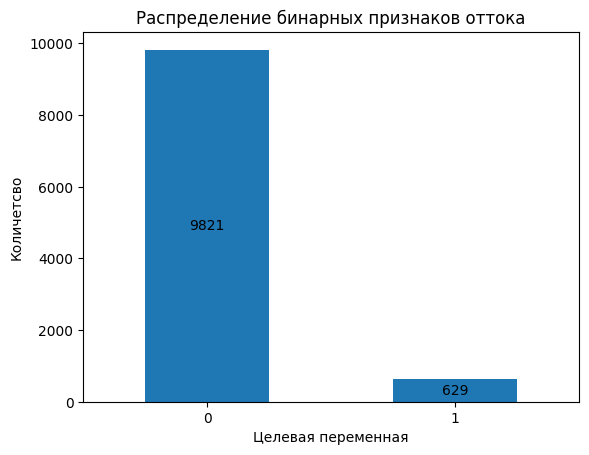

In [9]:
churn_counts = original_df['churn'].value_counts()

ax = churn_counts.plot(
    kind='bar',
    title='Распределение бинарных признаков оттока',
    xlabel='Целевая переменная',
    ylabel='Количетсво',
    rot=0
)

ax.bar_label(ax.containers[0], label_type='center')

plt.show()

In [10]:
print(f'Лояльные клиенты: {churn_counts[0] / churn_desc['count'] * 100:.0f}%')
print(f'Ушедшие клиенты: {churn_counts[1] / churn_desc['count'] * 100:.0f}%')

Лояльные клиенты: 94%
Ушедшие клиенты: 6%


Целевая переменная churn является бинарной и указывает на отток клиентов, что подтверждает необходимость обучать именно LogisticRegression.

В данных наблюдается сильный дисбаланс классов: 94% наблюдений относятся к классу с лояльными клиентами и только 6% - к классу с ушедшими клиентами.

Из-за такого соотношения стандартная метрика accuracy будет неинформативна. Для оценки качества модели следует использовать метрику, устойчивую к дисбалансу: PR-AUC.

---

<a id='9-bullet'></a>

In [11]:
temp_len = len(original_df)

Признаки, которые стоит удалить: 
1. Идентификаторы
- user_id - модель может начать запоминать их вместо общих закономерностей, что приведет к переобучению
2. Мультиколлинеарность
- order_frequency_week и order_frequency_month - удалить order_frequency_week. Признак order_frequency_month более устойчивый к шуму.

- avg_order_value и median_order_value - удалить avg_order_value. Медиана более устойчива к выбросам.

- total_spent_last_week и total_spent_last_month - удалить order_frequency_week. total_spent_last_month - более стабильный и релевантный индикатор снижения вовлеченности.
    
    - review_rating_last_1 и review_rating_last_10 - стоит проверить два признака на их корреляцию между собой. Если окажется, что они друг на друга не влияют, то последний отзыв может говорить об эмоциональной реакции, а крайние 10 о стабильном, усредненном тренде.

Остальная фильтрация признаков будет на этапе просмотра корреляций.

In [12]:
df = original_df.copy()

df = df.drop(columns=['user_id', 'order_frequency_week', 'avg_order_value', 'total_spent_last_week'])

---

<a id='10-bullet'></a>

Удаление явных дубликатов

In [13]:
print('Число явных дубликатов:', df.duplicated().sum())

df = df.drop_duplicates()

Число явных дубликатов: 414


---

<a id='11-bullet'></a>

Создание копии датасета для EDA анализа

In [14]:
df_eda = df.copy()

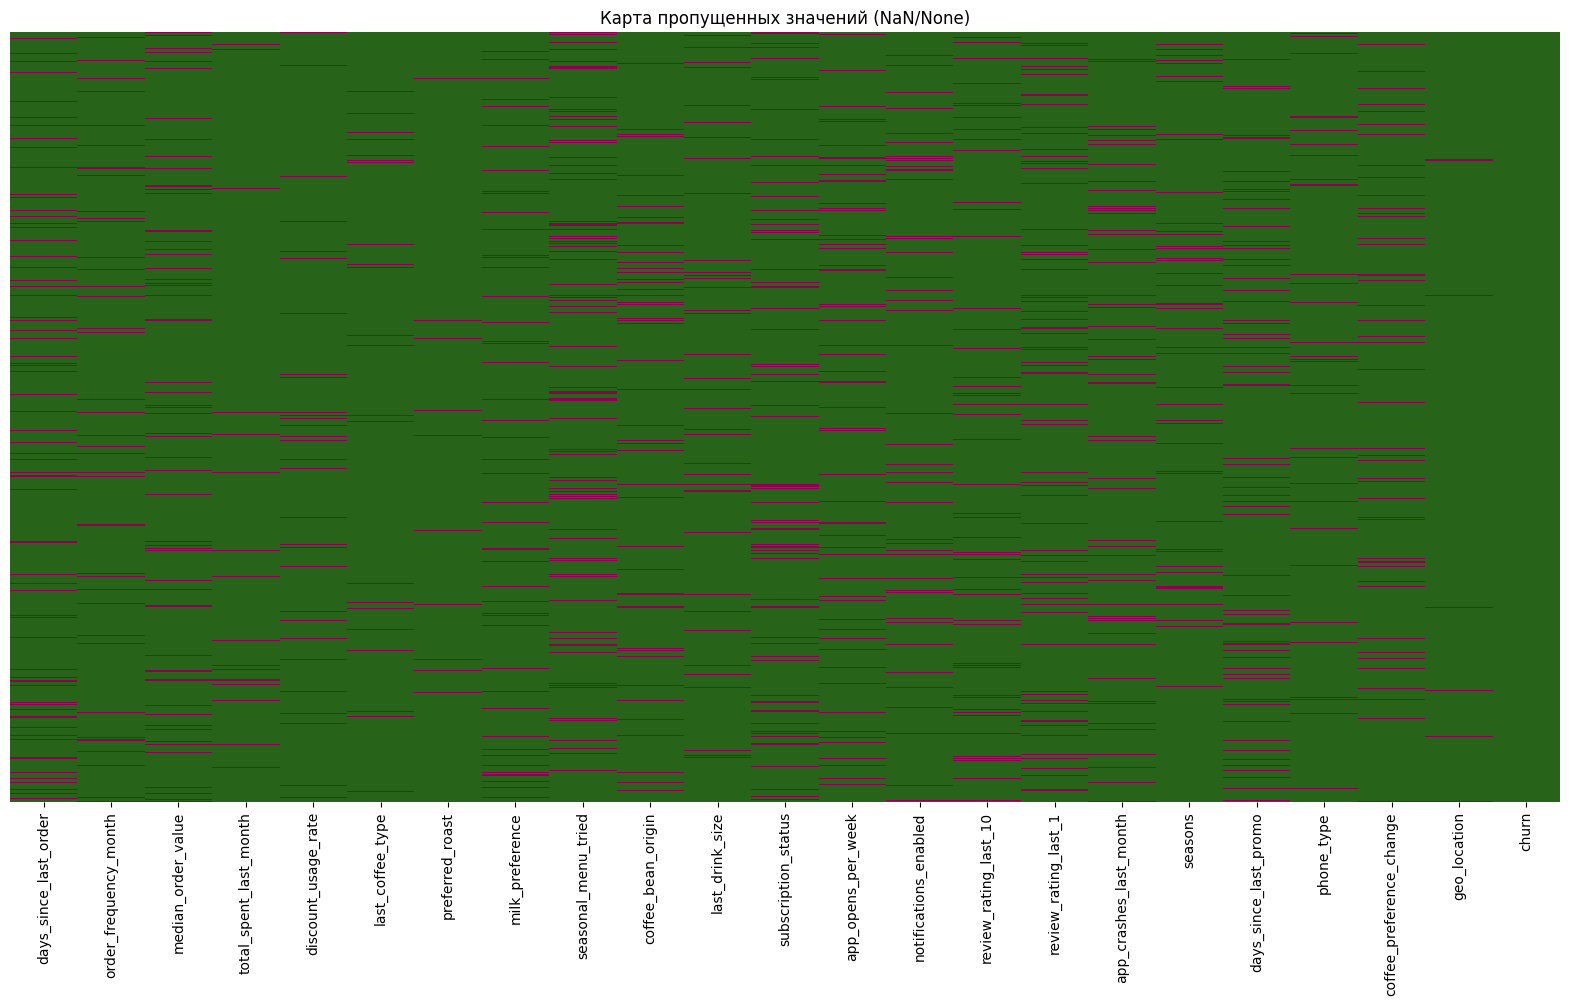

In [15]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df_eda.isna().astype(int), yticklabels=False, cbar=False, cmap='PiYG_r', xticklabels=df_eda.columns)

plt.title("Карта пропущенных значений (NaN/None)")
plt.show()

Обработка пропущенных значений

In [16]:
def show_missing_stats(df):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean() * 100
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    return missing_stats \
            .sort_values(by='Кол-во пропусков', ascending=False) \
            .style.format({'Доля пропусков': '{:.2f}%'}) \
            .background_gradient(cmap='coolwarm')

show_missing_stats(df_eda)

,Кол-во пропусков,Доля пропусков
seasonal_menu_tried,950,9.47%
days_since_last_order,902,8.99%
subscription_status,892,8.89%
app_opens_per_week,857,8.54%
review_rating_last_1,822,8.19%
median_order_value,804,8.01%
days_since_last_promo,698,6.95%
app_crashes_last_month,694,6.92%
review_rating_last_10,674,6.72%
seasons,654,6.52%


План обработки пропущенных значений: 

- seasonal_menu_tried - пользователь никогда не пробовал меню. Заполнить 0.

- days_since_last_order и days_since_last_promo - клиент никогда не заказывал/использовал промокод. Заполнить 0 нельзя (это будет значить заказывал/использовал сегодня), можно применить к признаку инверсию и перенести логику в recency_score, чем ближе его значение к 1, тем недавнее заказывали/использовали промокод. Формула расчета: 1 / (days + 1)

- subscription_status - пользователь не имеет платной подписки. Заполнить значением, которое уже есть в признаке - 'none'.

- app_opens_per_week - пользователь не пользовался приложением. Заполнить 0.

- review_rating_last_1 и review_rating_last_10 - заполнить средним + добавить флаг при обучении. Если отзыва нет, первое слагаемое станет медианой, а второе (флаг) скорректирует предсказание.

- median_order_value, order_frequency_month и total_spent_last_month - стоит заполнит 0-ом, так как это можно трактовать как отсутствие заказов.

- app_crashes_last_month - нет данных о крашах - приложение работало стабильно. Заполнить 0.

- coffee_bean_origin, seasons, last_drink_size, phone_type, last_coffee_type, preferred_roast и geo_location - создание отдельной категории для незаполненных категориальных данных 'unknown'. При этом на этапе обучения модели данные параметры будут переводиться через OneHotEncoder с параметром handle_unknown - ignore, чтобы учитывать в данных пропуски (получить вектор из 0).

- milk_preference - предпочтительное молоко у пользователя отсутствует. Заполнить существующей категорией 'none'.

- coffee_preference_change - предпочтения не менялись. Заполнить 0.

- notifications_enabled - у пользователя выключены уведомления. Заполнить 0.

- discount_usage_rate - скидками не пользовался. Заполнить 0.

Создание функции для инверсии

In [17]:
def inverse_transform(x):
    return 1 / (x + 1)

Выделение групп признаков для анализа и последующего создания Pipeline-а

In [18]:
def get_num_cols(df):
    # Во избежание data leakage целевая переменная всегда проверяется и если требуется - удаляется
    if 'churn' in df.columns:
        df = df.drop(columns='churn')

    return df.select_dtypes(include=['number']).columns

def get_cat_cols(df):
    return df.select_dtypes(include=['object']).columns

In [19]:
days_since_cols = ['days_since_last_order', 'days_since_last_promo']

review_cols = ['review_rating_last_1', 'review_rating_last_10']

num_cols_eda = get_num_cols(df_eda)
cat_cols_eda = get_cat_cols(df_eda)

cat_cols_with_none = ['subscription_status', 'milk_preference']

cat_target_cols = ['geo_location']

In [20]:
df_eda[review_cols] = df_eda[review_cols].fillna(df_eda[review_cols].median())

df_eda[num_cols_eda] = df_eda[num_cols_eda].fillna(0)
df_eda[days_since_cols] = df_eda[days_since_cols].apply(inverse_transform)

df_eda[cat_cols_with_none] = df_eda[cat_cols_with_none].fillna('none')
df_eda[cat_cols_eda] = df_eda[cat_cols_eda].fillna('unknown')

show_missing_stats(df_eda)

'Пропусков в данных нет'

---

<a id='12-bullet'></a>

Анализ категориальных признаков

In [ ]:
def check_cat_features(df):
    cat_df = df.select_dtypes(include=['object'])

    data = []
    for col in cat_df.columns:
        data.append({
            'Признак': col,
            'Уникальные значения': df[col].unique(),
            'Кол-во': df[col].nunique(),
        })

    return pd.DataFrame(data)

check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,last_coffee_type,"[blend, arabica, robusta, unknown]",4
1,preferred_roast,"[light, medium, dark, unknown]",4
2,milk_preference,"[almond, whole, oat, skim, soy, none]",6
3,coffee_bean_origin,"[vietnam, guatemala, brazil, colombia, kenya, ...",7
4,last_drink_size,"[large, medium, small, unknown]",4
5,subscription_status,"[pro, none, premium, basic]",4
6,seasons,"[summer, autumn, spring, winter, unknown]",5
7,phone_type,"[android, ios, web, unknown]",4
8,geo_location,"[geo_75, geo_95, geo_25, geo_2, geo_19, geo_68...",101


Большинство категориальных признаков имеют от 3 до 7 уникальных значений, что меньше 10, а значит к ним можно применить OneHotEncoder, который создаст новые признаки на их основе.

geo_location - единственный признак с большим числом уникальных значений (кол-во: 100). В данно случае нужно применить TargetEncoding, иначе он зашумит модель.

Данных в датасете достаточно, чтобы попробовать комбинации разных признаков

In [22]:
# Экономическая мотивация
df_eda['sub_size_interact'] = df_eda['subscription_status'] + '_' + df_eda['last_drink_size']

# Поведенческие паттерны
df_eda['season_size'] = df_eda['seasons'] + '_' + df_eda['last_drink_size']


In [23]:
check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,last_coffee_type,"[blend, arabica, robusta, unknown]",4
1,preferred_roast,"[light, medium, dark, unknown]",4
2,milk_preference,"[almond, whole, oat, skim, soy, none]",6
3,coffee_bean_origin,"[vietnam, guatemala, brazil, colombia, kenya, ...",7
4,last_drink_size,"[large, medium, small, unknown]",4
5,subscription_status,"[pro, none, premium, basic]",4
6,seasons,"[summer, autumn, spring, winter, unknown]",5
7,phone_type,"[android, ios, web, unknown]",4
8,geo_location,"[geo_75, geo_95, geo_25, geo_2, geo_19, geo_68...",101
9,sub_size_interact,"[pro_large, none_medium, premium_small, none_l...",16


Новые признаки имеют больше 10 уникальных значений, значит пробразование через OHE не подойдёт, т.к. это раздует датасет. К этим новым параметрам можно применить Target Encoding.

Удаление признаков, которые не подходят для обучения будут удалены после проверки корреляции. Некоторые из категорий могут показаться не релевантными, но на деле будут влиять на предсказание решений клиента.

---

<a id='13-bullet'></a>

Анализ выбросов

In [24]:
df_eda.describe()

,days_since_last_order,order_frequency_month,median_order_value,total_spent_last_month,discount_usage_rate,seasonal_menu_tried,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,days_since_last_promo,coffee_preference_change,churn
count,10036.0,10036.000000,10036.000000,10036.000000,10036.000000,10036.0,10036.000000,10036.0,10036.000000,10036.000000,10036.0,10036.0,10036.0,10036.0
mean,0.43897,3.791661,416.381073,1889.611603,0.273128,0.633619,10.360362,0.714926,4.207184,4.019855,0.945297,0.246426,0.181945,0.059984
std,0.354826,2.903881,277.053741,2363.683082,0.164898,0.481839,14.235325,0.451472,0.755846,1.155378,1.00873,0.31475,0.385818,0.237469
min,0.02439,0.000000,-10.353340,-43.716463,0.000000,0.0,0.000000,0.0,1.415526,-0.897000,0.0,0.007092,0.0,0.0
25%,0.142857,1.676919,222.414181,575.729713,0.148692,0.0,5.286119,0.0,3.721888,3.293054,0.0,0.05,0.0,0.0
50%,0.333333,3.170049,379.857941,1247.587668,0.256713,1.0,8.695661,1.0,4.205958,3.989636,1.0,0.1,0.0,0.0
75%,1.0,5.273189,571.431412,2421.874228,0.381015,1.0,12.332876,1.0,4.679437,4.757374,2.0,0.25,0.0,0.0
max,1.0,27.389318,2189.101562,79298.849570,0.887301,1.0,224.587875,1.0,7.384425,8.558442,7.0,1.0,1.0,1.0


In [25]:
def create_df_boxplot(df, col=None, ax=None):
    data = df if col is None else df[col]
    
    if ax is None:
        _, ax = plt.subplots(figsize=(14, 8))
        standalone = True
    else:
        standalone = False
    
    sns.boxplot(data=data, ax=ax)
    
    title = 'Размах значений признака'
    if col is not None:
        title += f': {col}'

    ax.set_title(title)
    ax.set_ylabel('Значение признака')

    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)
    
    if standalone:
        return plt.show()

    return ax

In [26]:
discrete_cols = ['notifications_enabled', 'app_crashes_last_month', 'app_crashes_last_month_sq', 'coffee_preference_change', 'seasonal_menu_tried', 'churn']

def get_df_without_discrete(df, discrete_cols):
    for col in discrete_cols:
        if col in df.columns:
            df = df.drop(columns=col)

    return df

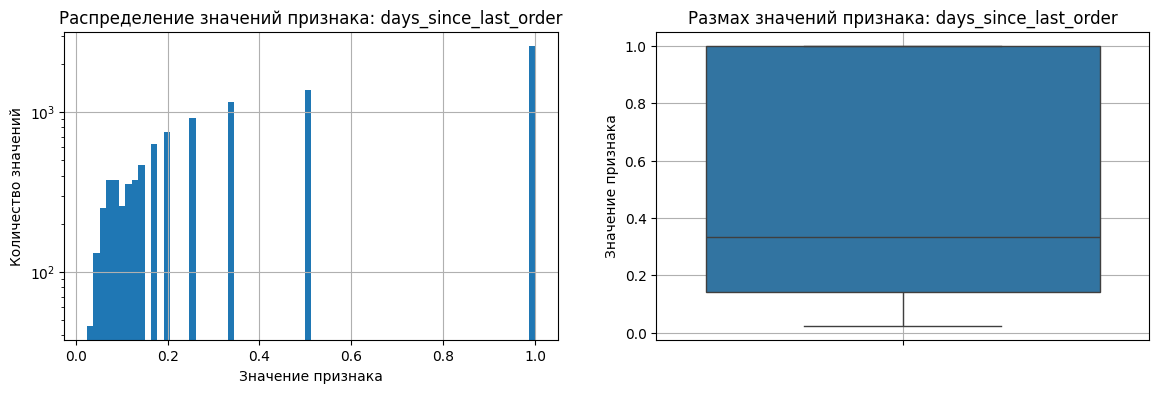

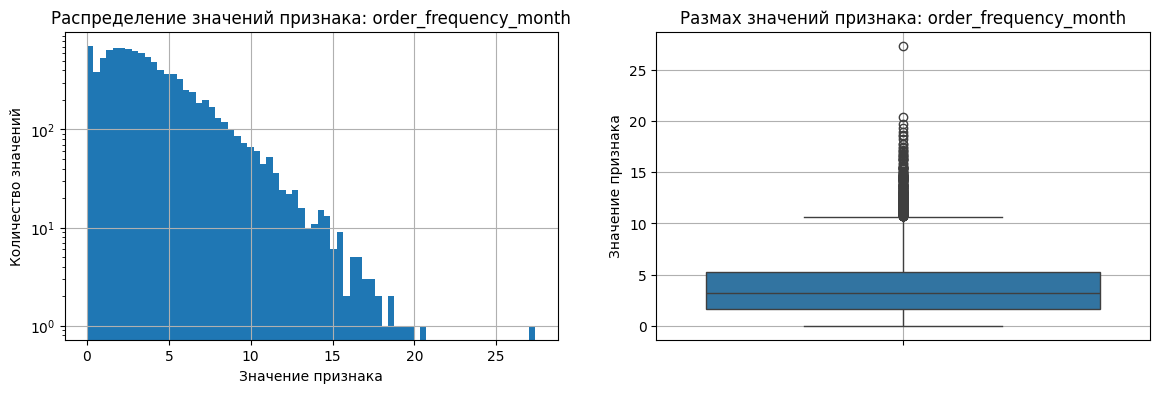

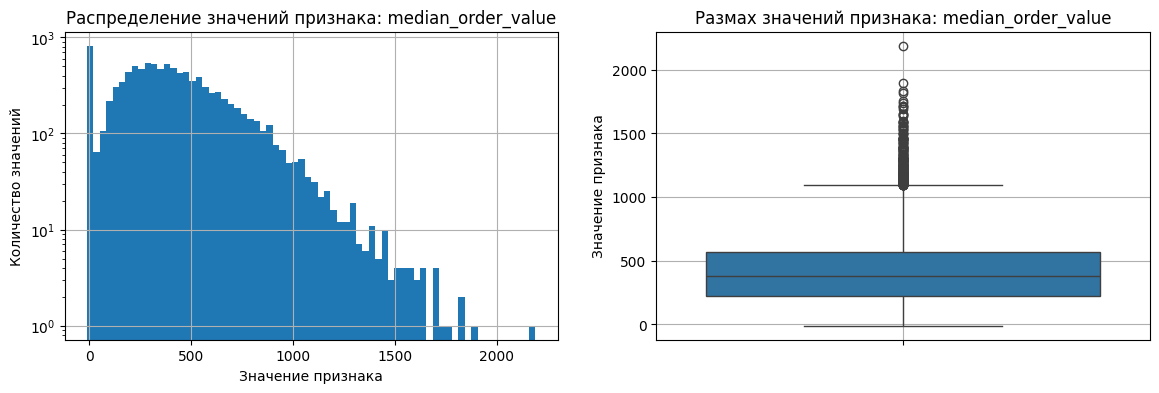

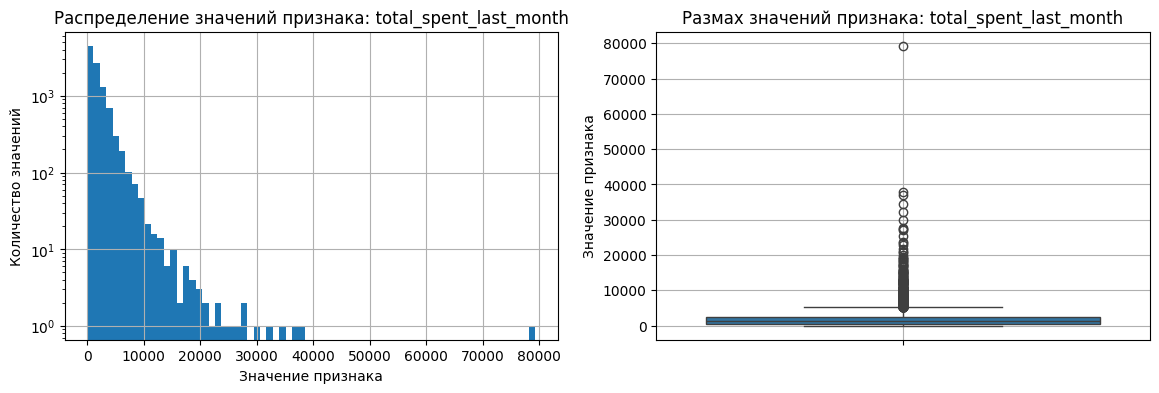

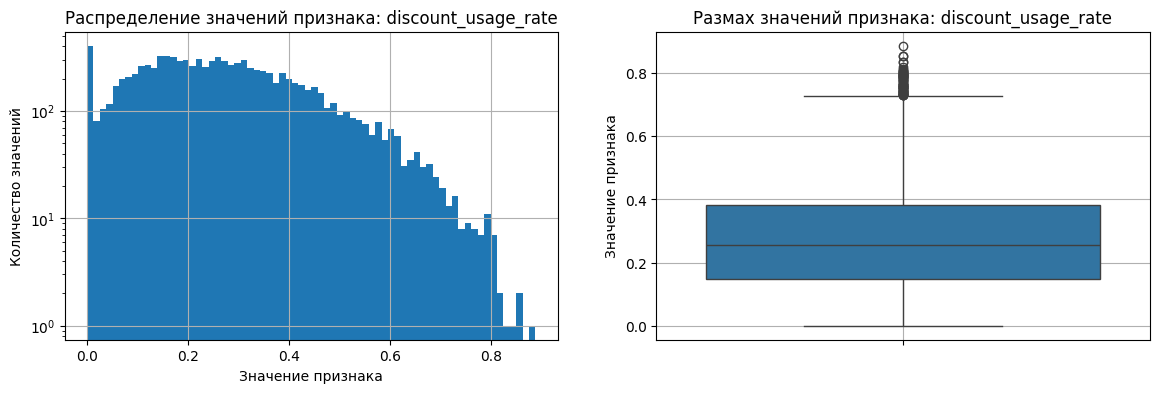

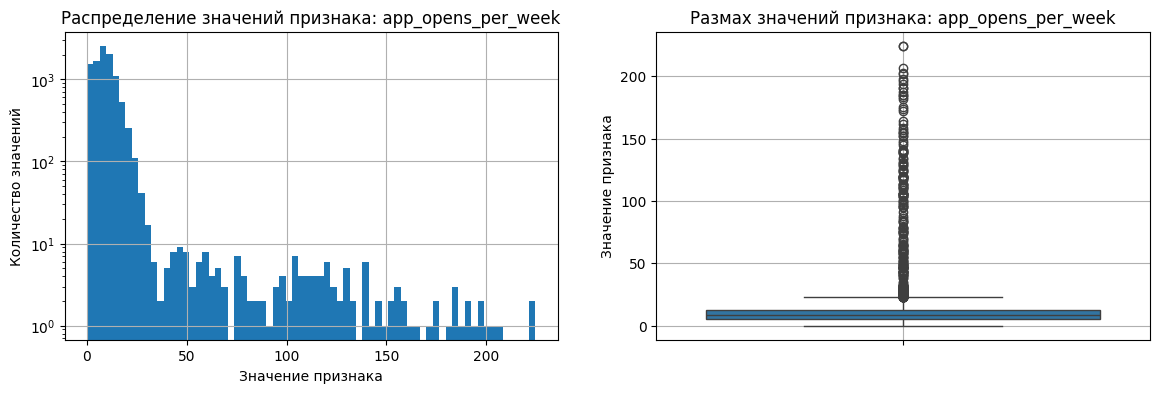

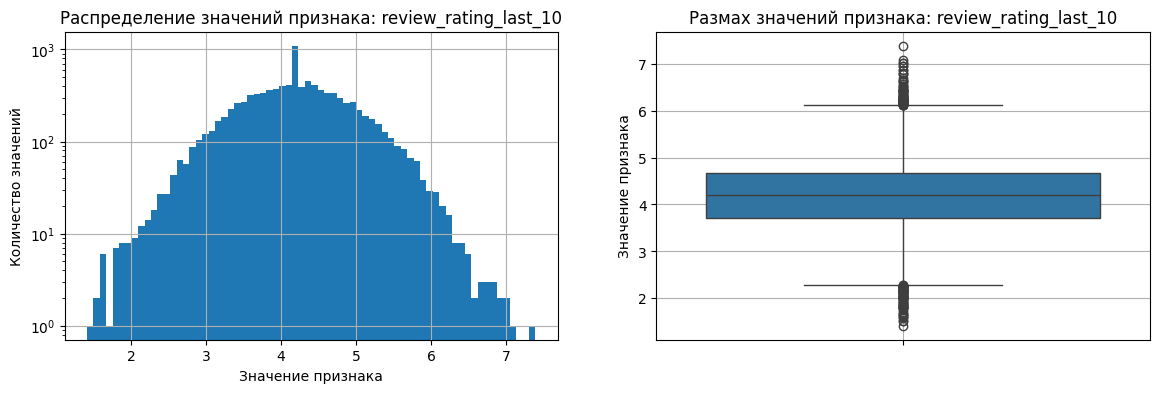

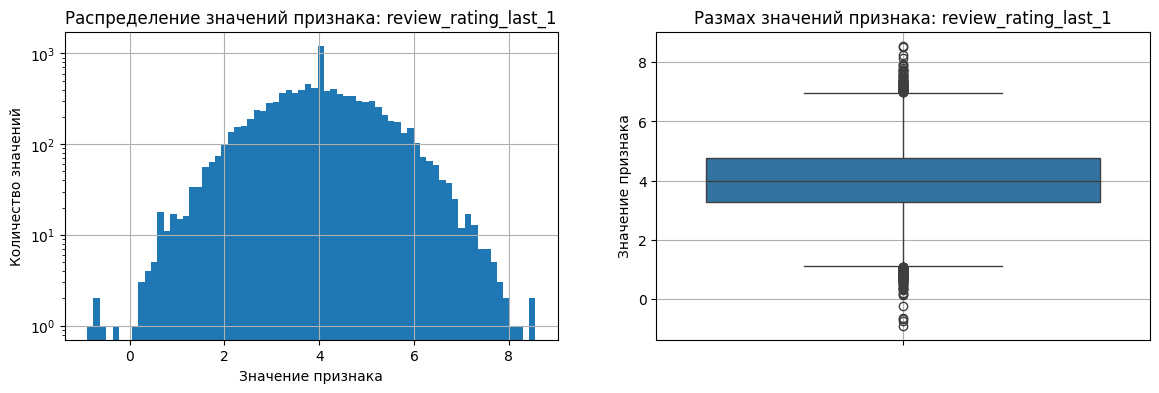

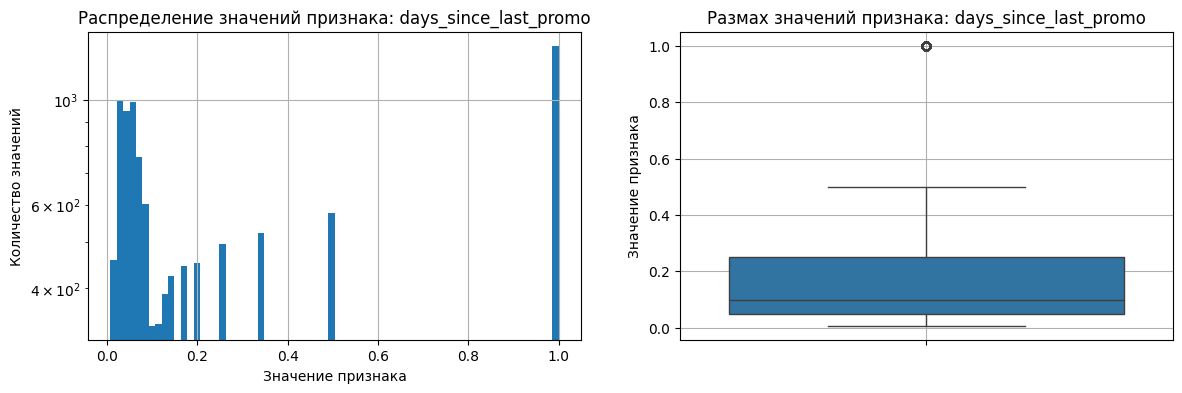

In [27]:
def get_non_binary_df(df):
    num_df = df.select_dtypes(include=['number'])
    return num_df.loc[:, ~num_df.isin([0, 1]).all()]

def get_emission_analysis(df):
    non_binary_df = get_non_binary_df(df)

    for col in non_binary_df.columns:
        _, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

        hist = axes[0]
        non_binary_df[col].plot(
            kind='hist',
            bins=70,
            grid=True,
            ax=hist
        )

        hist.set_title(f'Распределение значений признака: {col}')
        hist.set_xlabel('Значение признака')
        hist.set_ylabel('Количество значений')
        hist.set_yscale('log')

        create_df_boxplot(non_binary_df, col, axes[1])

        plt.show()
        
        plt.close()

interval_df = get_df_without_discrete(df_eda, discrete_cols)
get_emission_analysis(interval_df)

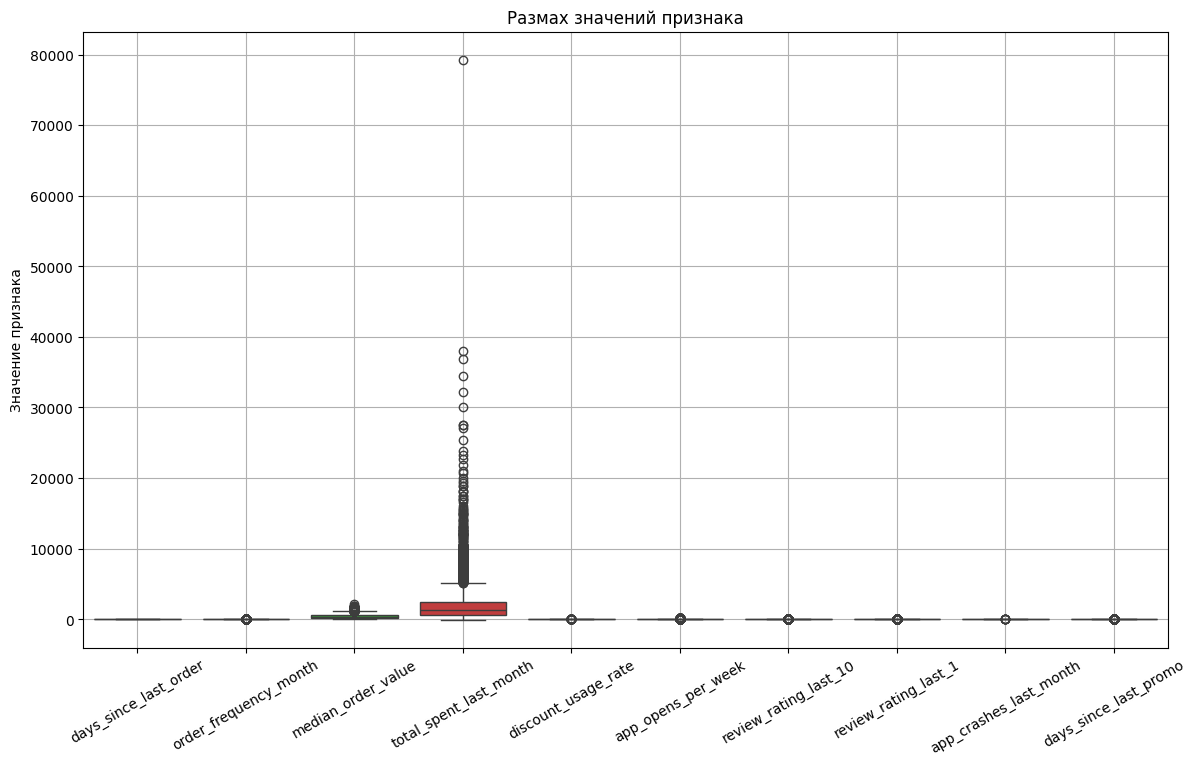

In [28]:
non_binary_df = get_non_binary_df(df_eda)

create_df_boxplot(non_binary_df)

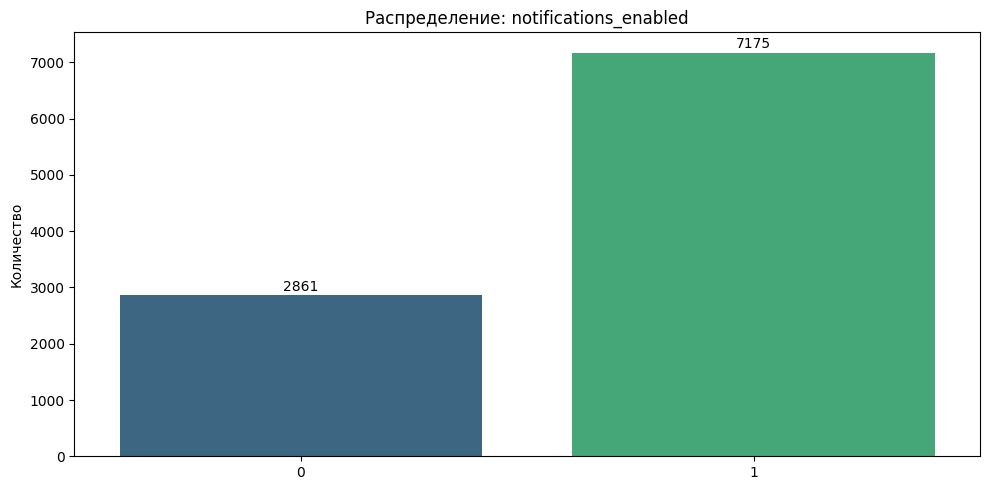

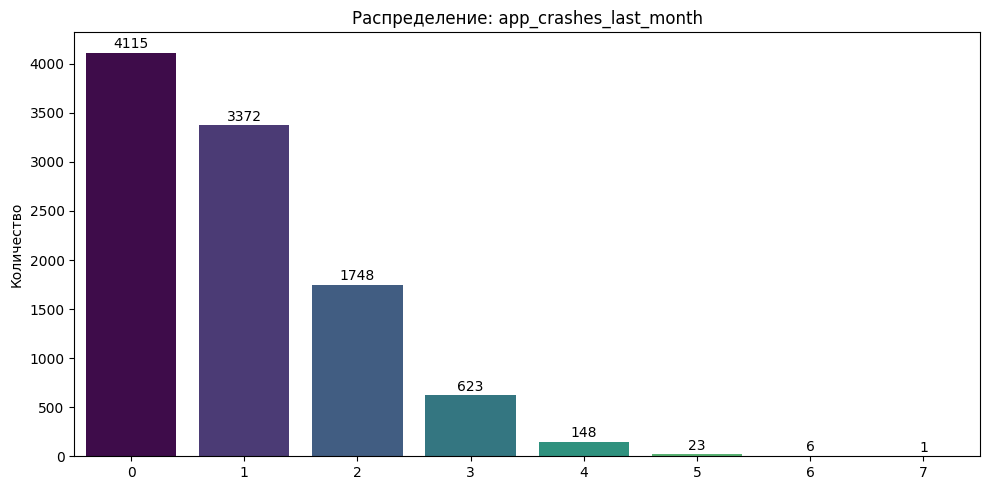

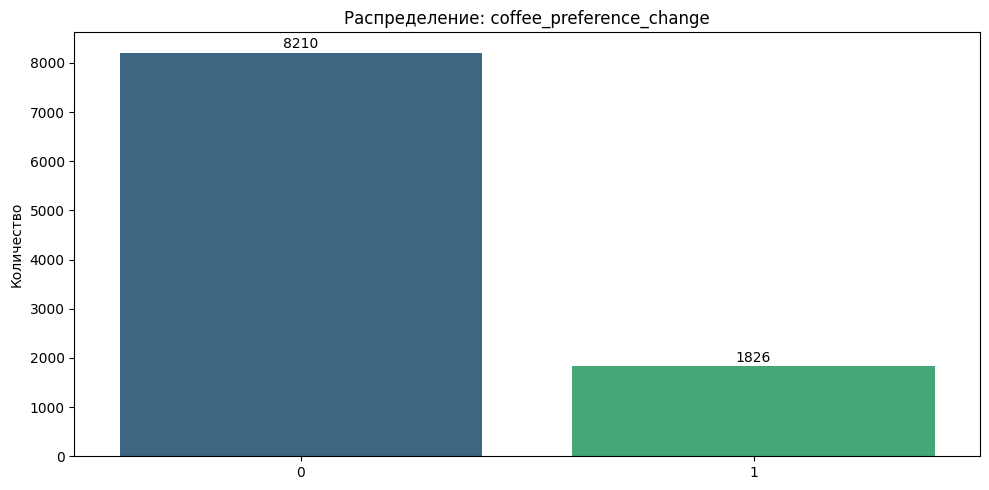

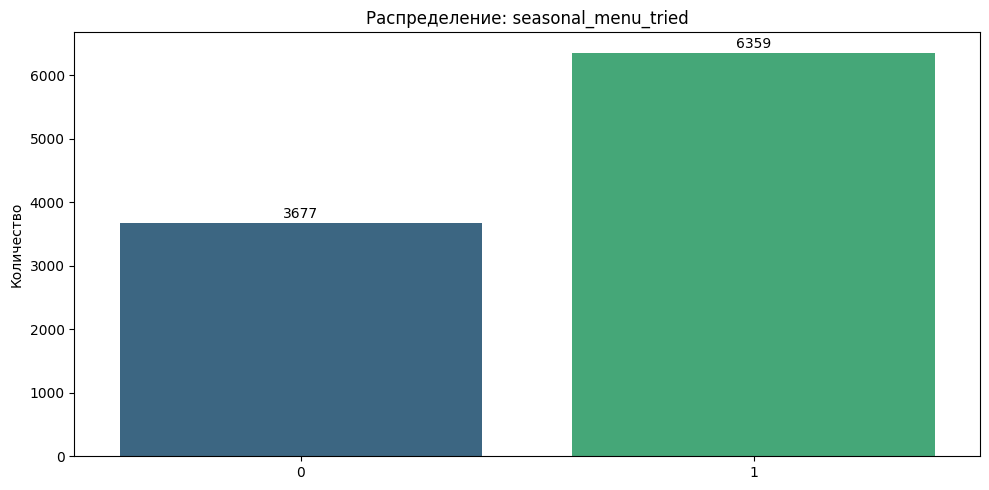

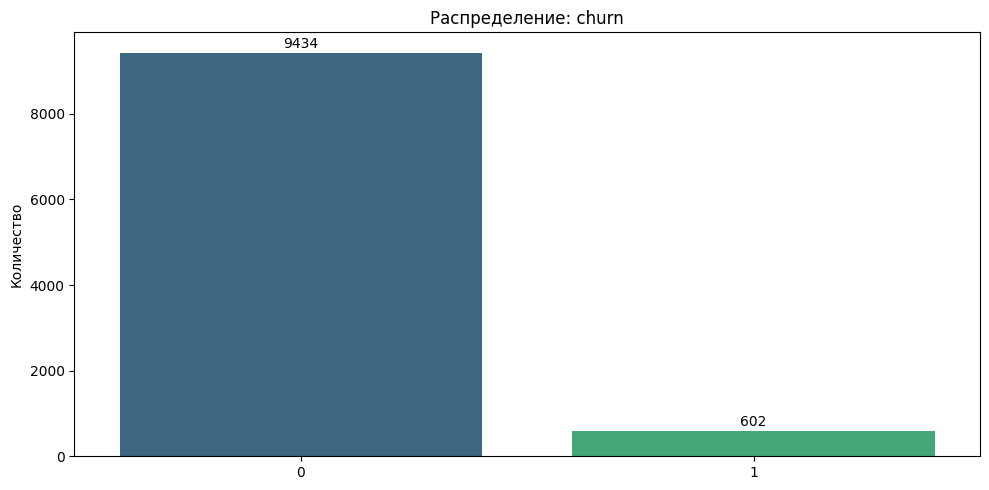

In [29]:
valid_features = [f for f in discrete_cols if f in df_eda.columns]

for _, feature in enumerate(valid_features):
    plt.figure(figsize=(10, 5)) 
    
    ax = sns.countplot(
        x=feature, 
        data=df_eda,
        hue=feature, 
        legend=False,
        palette='viridis'
    )
    
    plt.title(f'Распределение: {feature}')
    plt.xlabel('') # в title данная информация уже есть
    plt.ylabel('Количество')

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=1)

    plt.tight_layout()
    plt.show()
    
    plt.close()

В датасете есть строки, где числовое значение - отрицательное, что говорит об явной ошибке, поэтому такие данные стоит исключить.

In [30]:
def clip_negative_value(df, num_cols):
    df = df.copy()

    df[num_cols] = df[num_cols].clip(lower=0)

    return df

df_eda = clip_negative_value(df_eda, num_cols_eda)

Кроме того, все признаки имеют выбросы. При попытке удалить данные значения, это приведёт лишь к уменьшению датасета. И данная практика не будет правильной, т.к. удаление значений выше 99 процентиля ведёт к тому, что модель научится на среднем классе, но она не сможет предсказывать поведение VIP-сегмента. В таком случае стоит провести добавление новых признаков, которые уберут выбросы и сделают распределение похожим на нормальное без удаления данных.

- Логарифмирование применяется к денежным метрикам с тяжелым хвостом (total_spent_last_month, median_order_value, app_opens_per_week, order_frequency_month)

- Возведение в квадрат важных признаков (app_crashes_last_month)

In [31]:
heavy_tailed_cols = ['total_spent_last_month', 'median_order_value', 'app_opens_per_week', 'order_frequency_month']
for col in heavy_tailed_cols:
    df_eda[f'{col}_log'] = np.log1p(df_eda[col])

attention_cols = ['app_crashes_last_month']
for col in attention_cols:
    df_eda[f'{col}_sq'] = np.square(df_eda[col])

df_eda = df_eda.drop(columns=[*heavy_tailed_cols, *attention_cols])

df_eda.head()

,days_since_last_order,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,notifications_enabled,review_rating_last_10,review_rating_last_1,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn,sub_size_interact,season_size,total_spent_last_month_log,median_order_value_log,app_opens_per_week_log,order_frequency_month_log,app_crashes_last_month_sq
0,1.0,0.337031,blend,light,almond,0,vietnam,large,pro,1,5.176792,3.302238,summer,0.142857,android,0,geo_75,1,pro_large,summer_large,8.036247,5.566989,3.448981,2.634943,0
1,0.333333,0.547659,arabica,light,whole,1,guatemala,medium,none,1,4.392991,3.989636,autumn,0.058824,ios,0,geo_95,0,none_medium,autumn_medium,6.907136,6.294524,0.000000,0.943574,0
2,0.083333,0.120258,arabica,medium,oat,1,guatemala,small,premium,1,4.977713,4.379219,spring,0.083333,web,1,geo_25,0,premium_small,spring_small,7.192288,6.158026,2.938931,1.385461,0
3,1.0,0.000000,robusta,medium,skim,0,brazil,medium,none,1,3.712526,3.043617,summer,0.25,android,0,geo_2,0,none_medium,summer_medium,8.006577,6.564602,2.518142,1.667566,0
4,0.25,0.074990,robusta,dark,almond,1,colombia,medium,none,0,4.528271,5.642993,winter,0.066667,ios,0,geo_19,1,none_medium,winter_medium,9.033452,7.090387,2.830164,2.110197,1


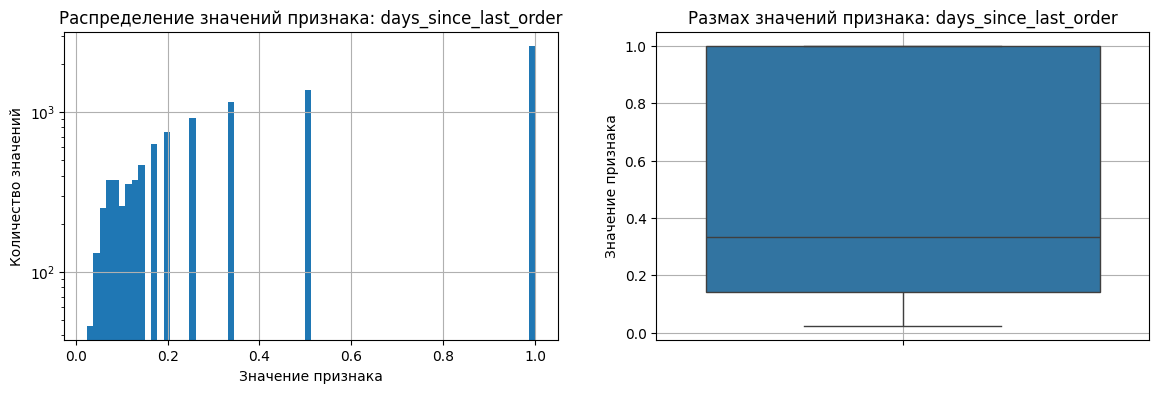

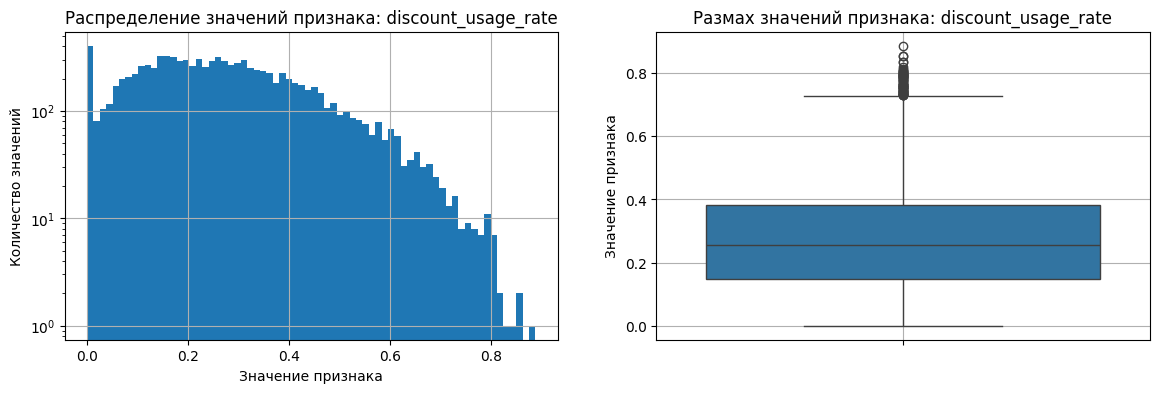

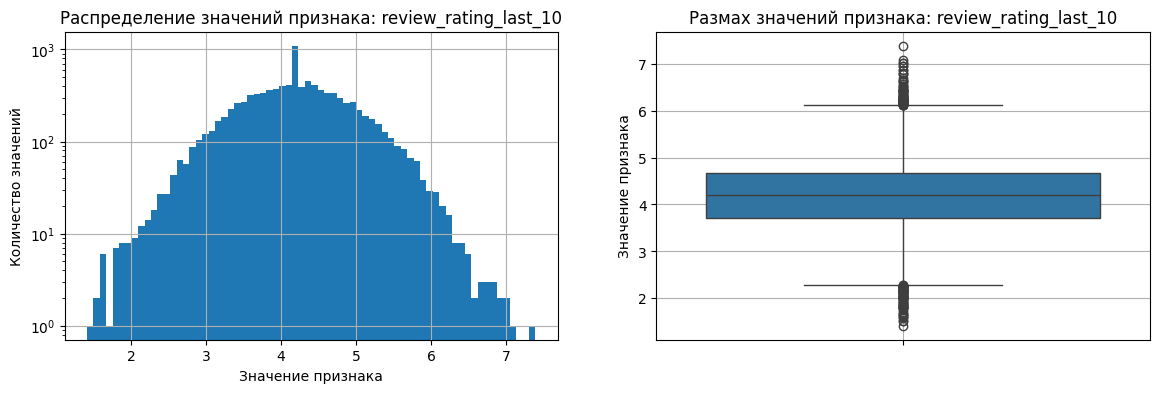

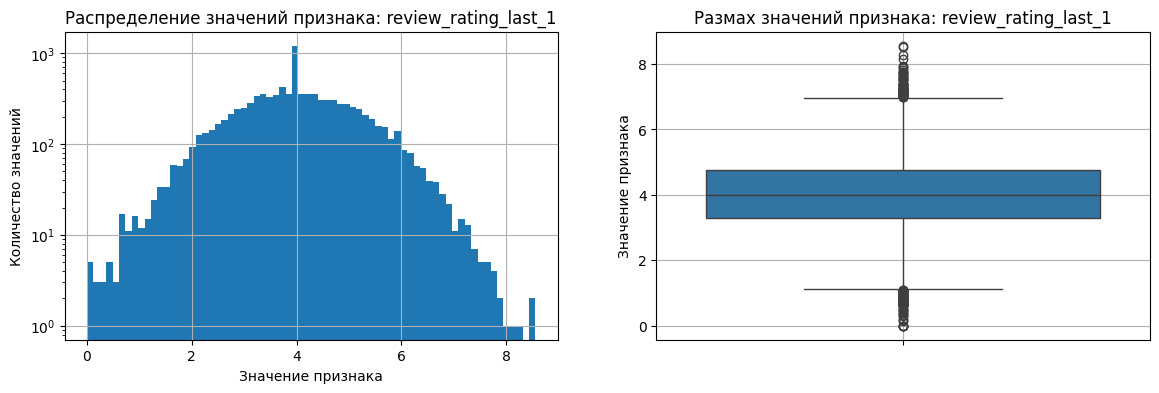

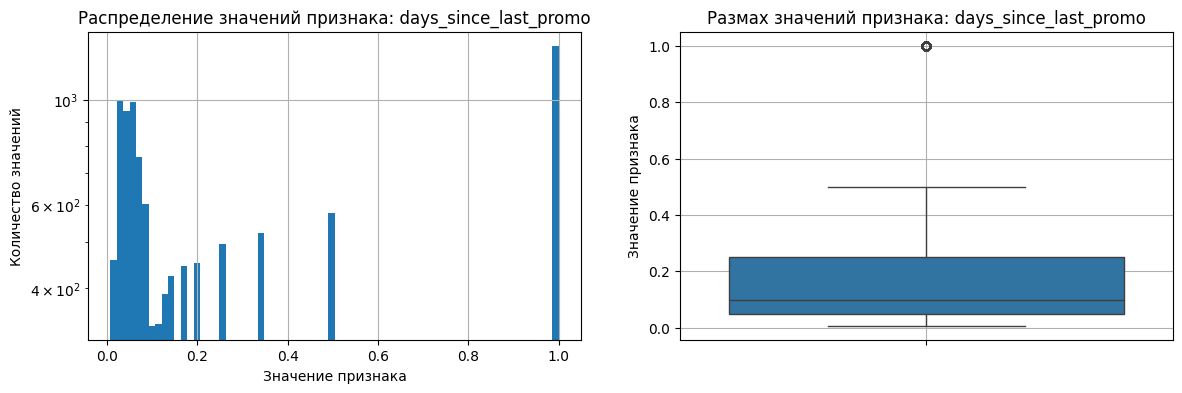

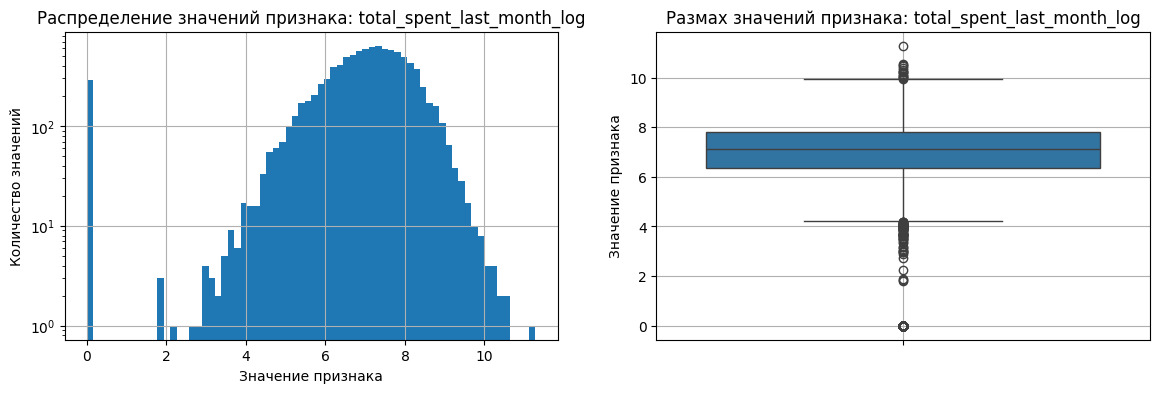

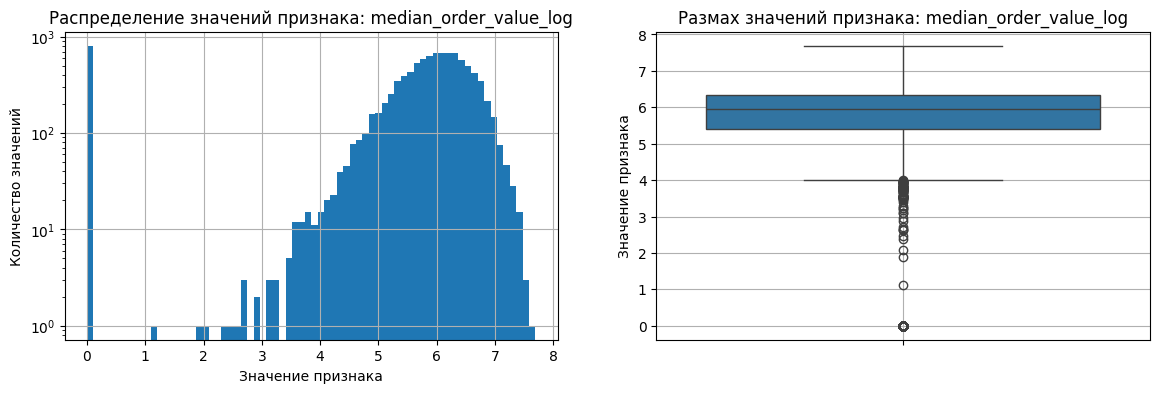

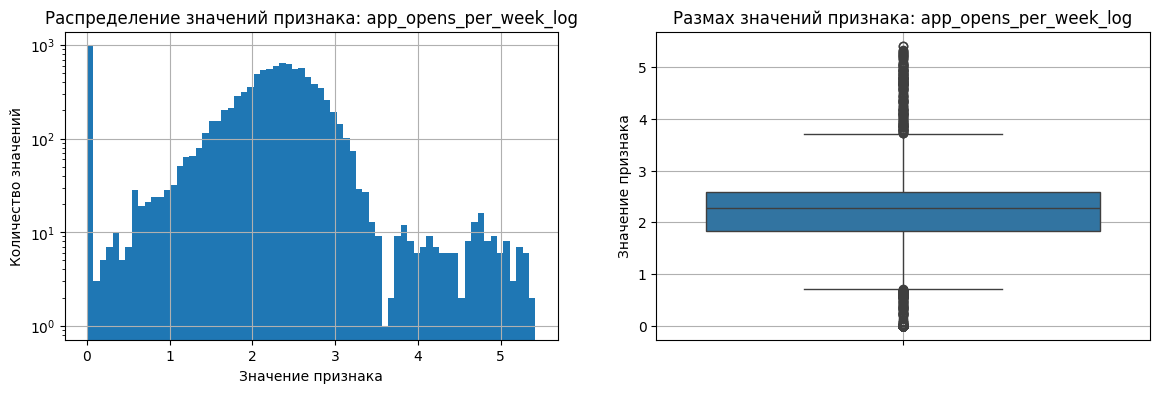

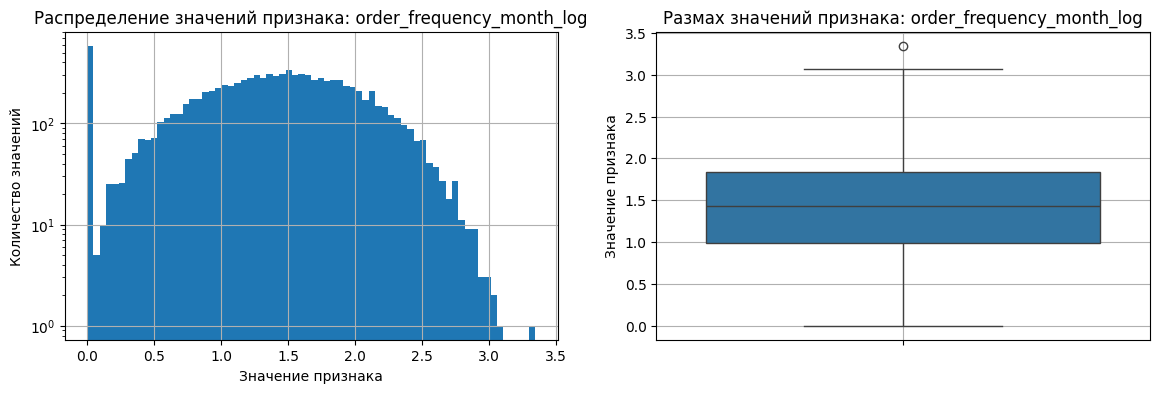

In [32]:
interval_df = get_df_without_discrete(df_eda, discrete_cols)

get_emission_analysis(interval_df)

После преобразования вместо хаотично разбросанных значений признаки стали ближе к распределению Гаусса (нормальному распределению). При этом заметен выраженный всплеск около значения 0. Веротяно, именно этим числом заполнялись пропуски. Чтобы модель могла распознавать такие подставленные значения и не уделять им слишком много внимания, она будет не только заменять пропуски на выбранное значение, но и создавать отдельный бинарный признак (add_indicator=True), который явно помечает, что исходное значение было пропущено и подставлено.

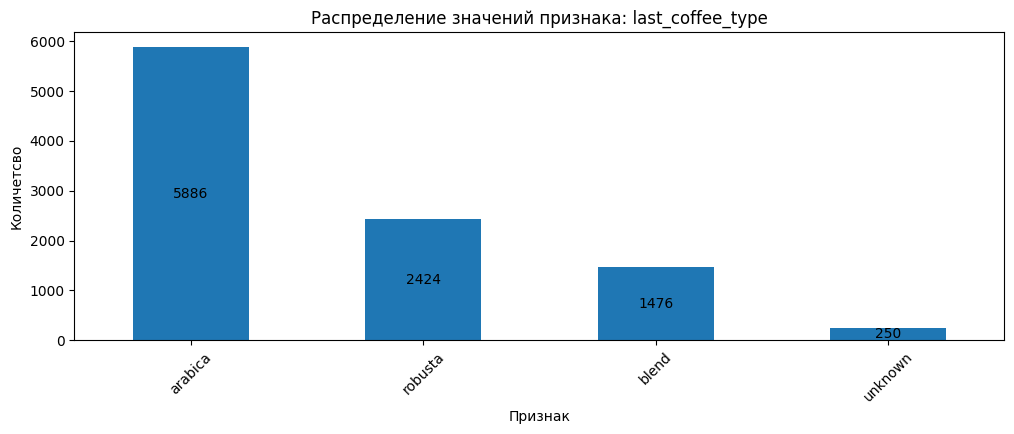

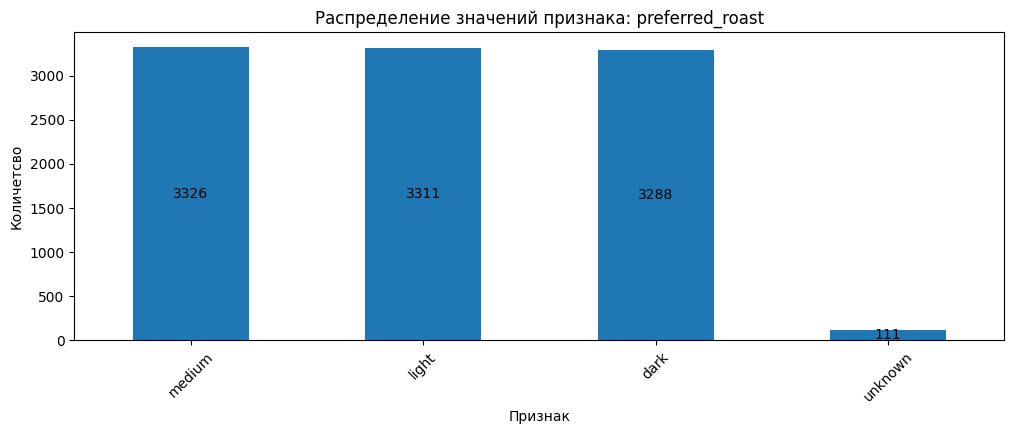

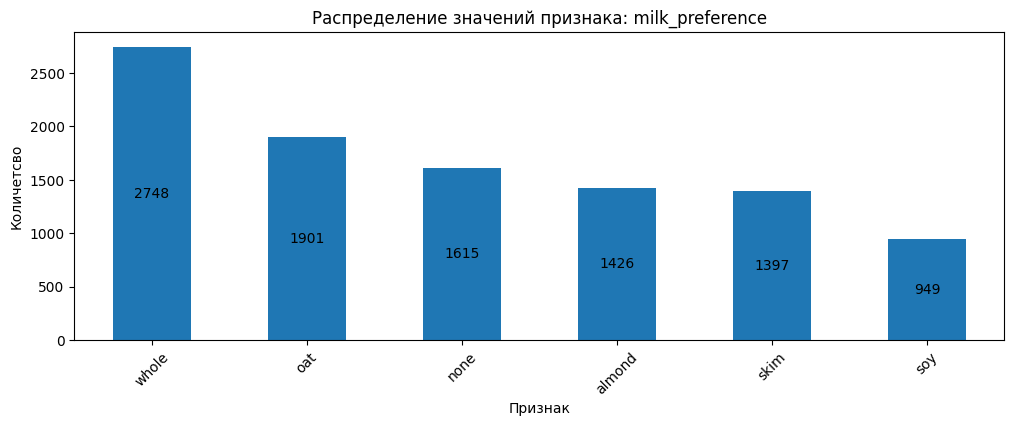

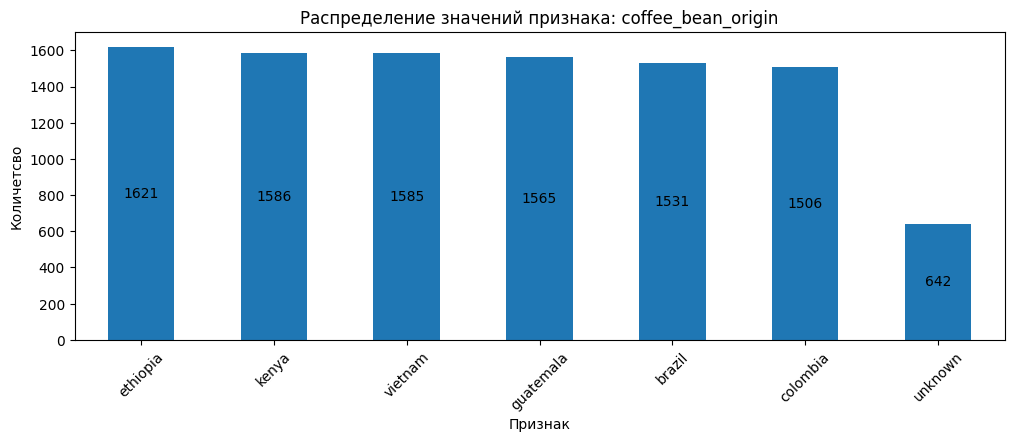

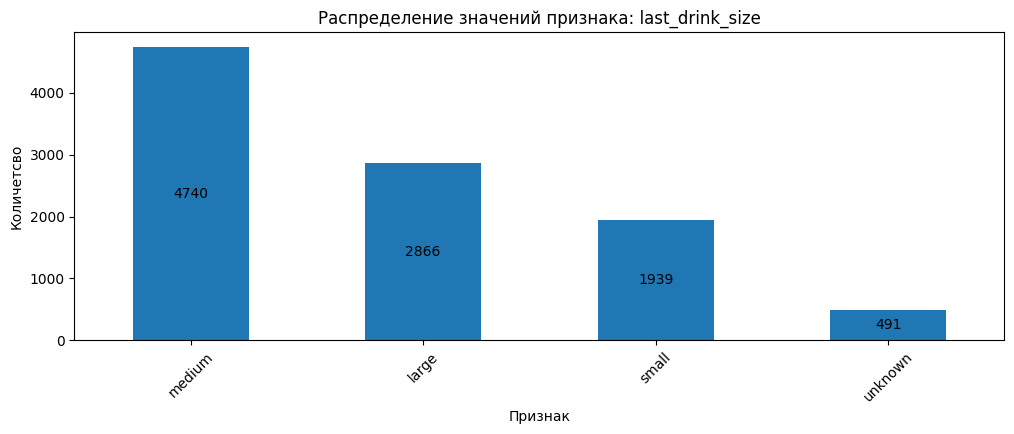

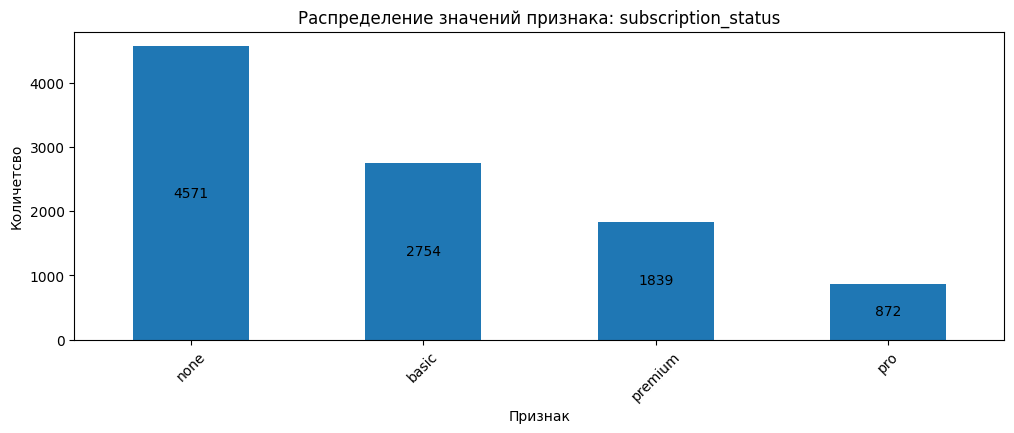

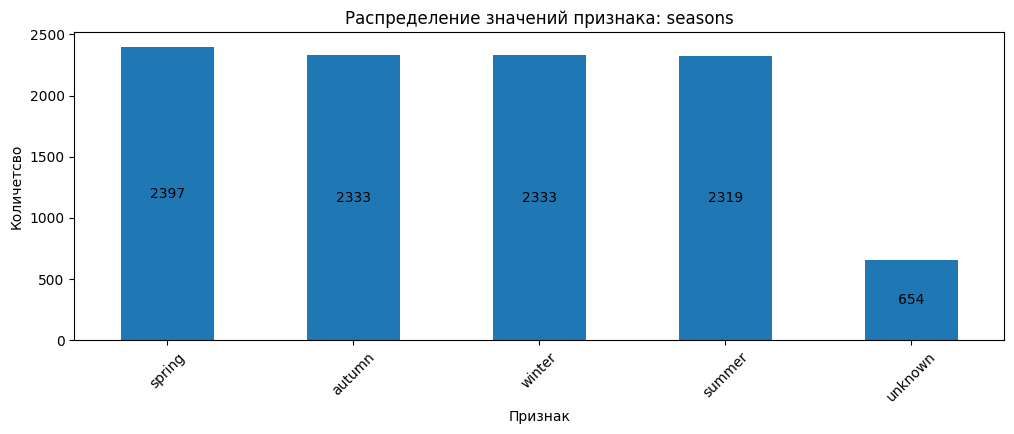

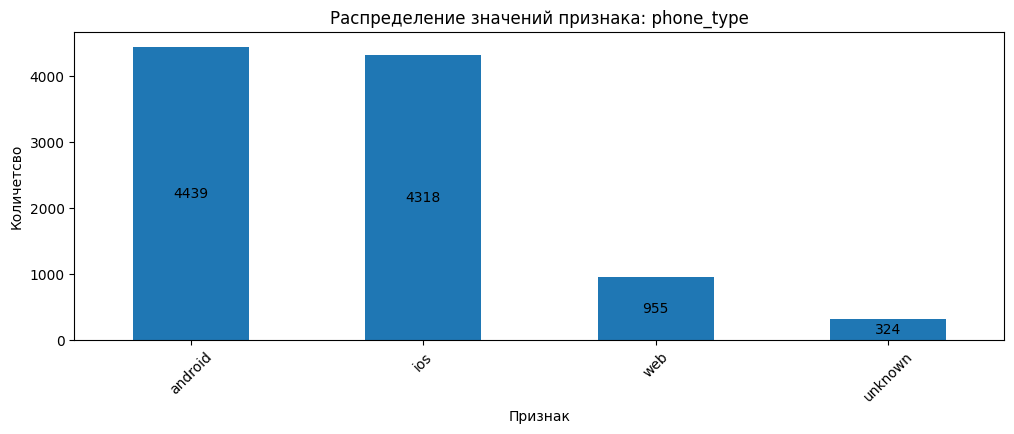

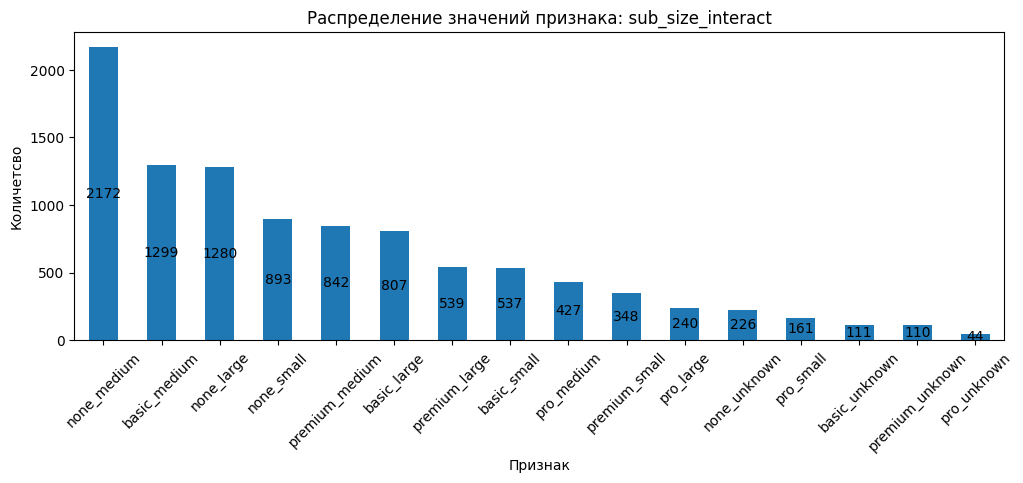

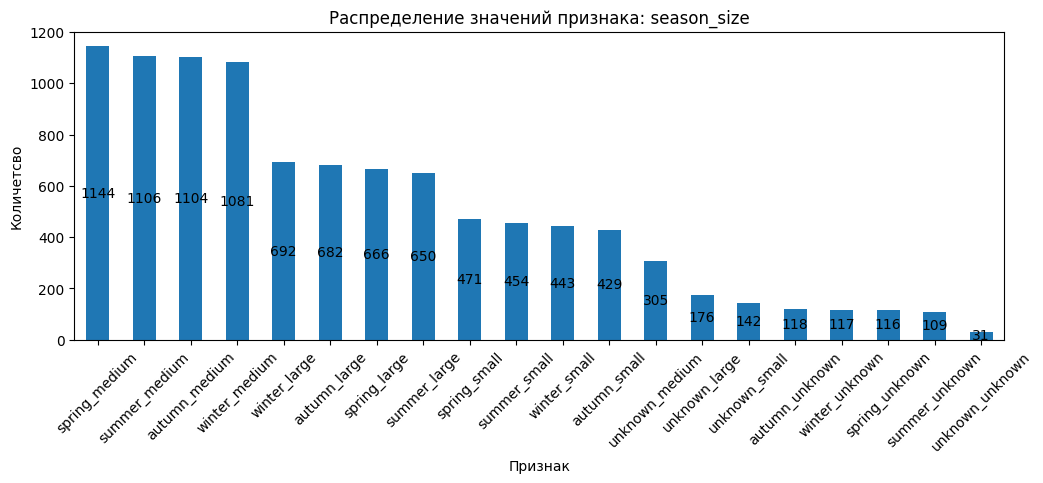

In [33]:
cat_df = df_eda.select_dtypes(include=['object'])
non_location_df = cat_df.drop(columns='geo_location')

for col in non_location_df.columns:
    ax = non_location_df[col].value_counts().plot(
        kind='bar',
        title=f'Распределение значений признака: {col}',
        xlabel='Признак',
        ylabel='Количетсво',
        figsize=(12, 4),
        rot=45
    )

    ax.bar_label(ax.containers[0], label_type='center')

    plt.show()

In [34]:
after = len(df_eda)
print(" Было строк в исходном датасете:", temp_len,
      '\n', "Осталось строк в датасете после обработки:", after,
      '\n', "Удалено строк в датасете после обработки:", temp_len-after,
      '\n', f"Процент потерь: {(temp_len-after)/temp_len*100:.2f}%")

 Было строк в исходном датасете: 10450 
 Осталось строк в датасете после обработки: 10036 
 Удалено строк в датасете после обработки: 414 
 Процент потерь: 3.96%


---

<a id='14-bullet'></a>

Визуализация корреляций

In [35]:
def create_heatmap(corr, title, ax=None):
    if ax is None:
        plt.figure(figsize=(6, 5))
        ax = plt.gca()

    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=.5,
        cbar=False,
        ax=ax
    )
    
    ax.set_title(title)
    
    if len(ax.figure.get_axes()) == 1:
        plt.show()

Подсчет корреляции между обработанными признаками EDA DataFrame

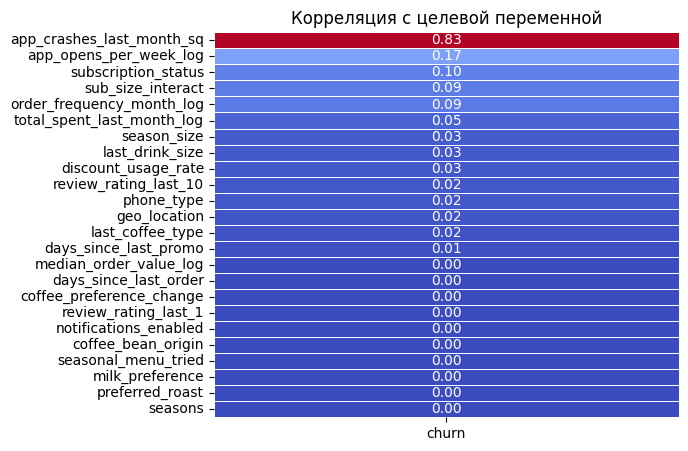

In [36]:
valid_discrete = [c for c in discrete_cols if c in df_eda.columns]
df_eda[valid_discrete] = df_eda[valid_discrete].astype('category')

corr_matrix = df_eda.phik_matrix(njobs=1, interval_cols=['days_since_last_order', 'discount_usage_rate', 'review_rating_last_10', 'review_rating_last_1', 'days_since_last_promo', 'total_spent_last_month_log', 'median_order_value_log', 'app_opens_per_week_log', 'order_frequency_month_log'])
target_correlation = corr_matrix[corr_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной')

Подсчет корреляции между признаками без EDA обработки

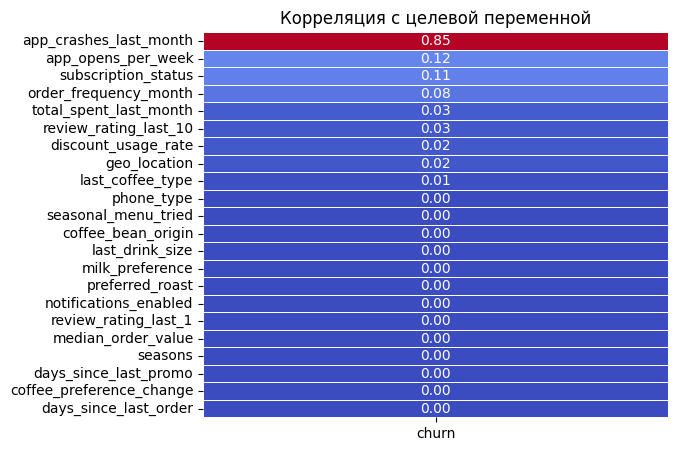

In [37]:
cp_df = df.copy()
valid_discrete = [c for c in discrete_cols if c in cp_df.columns]
cp_df[valid_discrete] = cp_df[valid_discrete].astype('category')

corr_matrix = cp_df.phik_matrix(njobs=1, interval_cols=['days_since_last_order', 'order_frequency_month', 'median_order_value', 'total_spent_last_month', 'discount_usage_rate', 'app_opens_per_week', 'review_rating_last_10', 'review_rating_last_1', 'days_since_last_promo'])
target_correlation = corr_matrix[corr_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной')


Результат корреляции после обработки данных стал лучше, потому что получилось вытащить скрытую пользу из признаков, которые в базовой корреляции были бесполезными.

Вот конкретные примеры улучшения:

- Самый коррелируемый признак (app_crashes_last_month) стал чуть меньше, что хорошо, так как другие признаки смогли увеличить свою значимость на целевую переменную. После логарифмирования признак частоты открытий приложения (app_opens_per_week) стал сильнее влиять на результат (с 0.12 до 0.17). Модели проще работать с такими "сглаженными" данными.

- Синергия признаков. Новый признак (sub_size_interact) дал корреляцию 0.09. Хороший пример того, что два слабых фактора (размер напитка и подписка) по отдельности не работали, но вместе дали сигнал.

- Размер напитка (last_drink_size) изначально имел 0 влияния. После обработки показал 0.03, перестав быть шумом.

На этапе корреляционного анализа признаки удаляться не будут - их влияние необходимо проверить непосредственно при обучении модели. Phik-матрица может показать отсутствие корреляции признака с целевой переменной, однако это не означает его бесполезность по двум причинам:

- Некоррелирующие признаки могут образовать полезные комбинации, которые повысят качество модели

- Признаки с нулевой корреляцией могут оказаться значимыми в контексте других переменных и улучшить метрики при обучении

Дополнительно для улучшения качества будет протестирована L1-регуляризация, которая обнулит веса действительно бесполезных признаков в процессе оптимизации.

---

<a id='15-bullet'></a>

#### Итог EDA

**Удалены признаки:** user_id, order_frequency_week, avg_order_value, total_spent_last_week

**Обработка:**
- В данном много незаполненой информации. Процент пропусков варьируются от 1% до 10%, а всего признаков с пропущенными значениями: 22. В 15 из них больше 5% пропусков. Если удалить все пропуски из всего датасета останется ~2600 строк, что сильно сократит данные для работы.

- Все пропущенные значения заменяются на логически обоснованные величины. При подготовке обучающей выборки для таких записей создается дополнительный бинарный признак-индикатор, указывающий на то, что значение было синтезировано.

- Часть признаков были инвертированы (days_since_last_order, days_since_last_promo) для корректного обозначения пропусков.

- Часть категориальных данных было преобразовано в супер-признаки за счет их комбинаций. 
    - "Экономическая мотивация" (sub_size_interact) - объединяет статус подписки (subscription_status) и размер напитка (last_drink_size). 
    - "Поведенческие паттерны" (season_size) - объединяет сезон (seasons) и размер напитка (last_drink_size). 

- Признаки с тяжелым хвостом были прологарифмированы (total_spent_last_month, median_order_value, app_opens_per_week, order_frequency_month).

- Важные, но небольшие значения (app_crashes_last_month) были возведены в квадрат.

- Обработка признаков помогла корреляционной матрице увидеть реальные связи там, где раньше был просто шум.

**Статистика:** 10450 => 10036 строк (удалено 414, 3.96%). Данные строки являются только явными дубликатами в данных.

## Этап 3. Предобработка данных



<a id='16-bullet'></a>

Фиксация списка колонок по признакам

In [38]:
num_cols = get_num_cols(df)
cat_cols = get_cat_cols(df)

Обнуление признаков, которые были меньше 0

In [39]:
df = clip_negative_value(df, num_cols)

In [40]:
df.head()

,days_since_last_order,order_frequency_month,median_order_value,total_spent_last_month,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
0,0,12.942519,260.645081,3089.991009,0.337031,blend,light,almond,<NA>,vietnam,large,pro,30.468321,1,5.176792,3.302238,<NA>,summer,6,android,0,geo_75,1
1,2,1.569146,540.597839,998.380941,0.547659,arabica,light,whole,1,guatemala,medium,none,NaN,1,4.392991,NaN,0,autumn,16,ios,0,geo_95,0
2,11,2.996666,471.494568,1328.140204,0.120258,arabica,medium,oat,1,guatemala,small,premium,17.895638,1,4.977713,4.379219,0,spring,11,web,1,geo_25,0
3,0,4.299255,708.529785,2999.628366,NaN,robusta,medium,skim,0,brazil,medium,none,11.405533,1,3.712526,3.043617,0,summer,3,android,0,geo_2,0
4,3,7.249865,1199.372925,8377.729478,0.074990,robusta,dark,almond,1,colombia,medium,none,15.948238,0,4.528271,5.642993,1,winter,14,ios,0,geo_19,1


---

<a id='17-bullet'></a>

Разбиение данных на выборки

In [41]:
def split_df(df):
    X = df.drop(columns='churn')
    y = df['churn']

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X,
        y,
        test_size=.2,
        stratify=y,
        shuffle=True,
        random_state=RANDOM_STATE
    )

    print(f"Размер обучающей выборки: {X_train_val.shape}")
    print(f"Размер тестовой выборки: {X_test.shape}")
    print(f"Доля положительного класса в train: {y_train_val.mean():.3f}")
    print(f"Доля положительного класса в test: {y_test.mean():.3f}")
    
    return X_train_val, X_test, y_train_val, y_test

In [42]:
X_train_val, X_test, y_train_val, y_test = split_df(df)

Размер обучающей выборки: (8028, 22)
Размер тестовой выборки: (2008, 22)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


---

<a id='18-bullet'></a>

Набор функций, которые будут регулировать работу Pipeline и помогут протестировать разные комбинции признаков

In [43]:
@dataclass
class FeatureConfig:
    numeric: List[str]
    categorical: List[str]
    days_since: List[str] = field(default_factory=list)
    reviews: List[str] = field(default_factory=list)
    cat_with_none: List[str] = field(default_factory=list)
    cat_target_cols: List[str] = field(default_factory=list)
    crashes_cols: List[str] = field(default_factory=list)
    log_cols: List[str] = field(default_factory=list)
    sq_cols: List[str] = field(default_factory=list)
    interaction_pairs: List[tuple] = field(default_factory=list)

def combine_columns(x):
    return pd.DataFrame(x).astype(str).agg('_'.join, axis=1).values.reshape(-1, 1)

def bin_crashes(x):
    if not isinstance(x, pd.DataFrame):
        x = pd.DataFrame(x, columns=[f"x{i}" for i in range(x.shape[1])])

    bins = [-np.inf, 1, 2, np.inf]
    labels = ['zero', 'low', 'high']
    
    out_df = pd.DataFrame(index=x.index)
    for col in x.columns:
        out_df[f"{col}_cat"] = pd.cut(x[col], bins=bins, labels=labels, right=True)

    return out_df.astype(object)

def get_binned_names(transformer, input_features):
    if hasattr(transformer, "feature_names_in_"):
        input_features = transformer.feature_names_in_
    else:
        n_features = getattr(transformer, "n_features_in_", 1) 
        input_features = [f"x{i}" for i in range(n_features)]
    return [f"{col}_cat" for col in input_features]

def get_combine_names(_, input_features):
    return ["_".join(input_features) + "_combined"]

def create_preprocessor(cfg: FeatureConfig, use_interactions=False):
    num_exceptions = set(
        cfg.log_cols + 
        cfg.sq_cols + 
        cfg.days_since + 
        cfg.reviews + 
        cfg.crashes_cols
    )
    
    cat_exceptions = set(
        cfg.cat_with_none +
        cfg.cat_target_cols
    )
    
    standard_num_cols = [c for c in cfg.numeric if c not in num_exceptions]
    standard_cat_cols = [c for c in cfg.categorical if c not in cat_exceptions]

    transformers = [
        ('num', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
            StandardScaler()
        ), standard_num_cols),
        
        ('ohe', OneHotEncoder(drop='first'), standard_cat_cols)
    ]

    if len(cfg.days_since) > 0:
        transformers.append(('inverse', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
            FunctionTransformer(inverse_transform, feature_names_out="one-to-one")
        ), cfg.days_since)),

    if len(cfg.reviews) > 0:
        transformers.append(('review', make_pipeline(
            SimpleImputer(strategy='mean', add_indicator=True),
            StandardScaler()
        ), cfg.reviews)),
        
    if len(cfg.cat_with_none) > 0:
        transformers.append(('cat_none', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='none'),
            OneHotEncoder(drop='first')
        ), cfg.cat_with_none)),
        
    if len(cfg.cat_target_cols) > 0:
        transformers.append(('target', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='unknown'),
            TargetEncoder(), 
        ), cfg.cat_target_cols)),
        
    if len(cfg.crashes_cols) > 0:
        transformers.append(('crashes', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0),
            FunctionTransformer(bin_crashes, validate=False, feature_names_out=get_binned_names),
            OneHotEncoder(sparse_output=False, drop='first')
        ), cfg.crashes_cols))

    if use_interactions:
        if len(cfg.interaction_pairs) > 0:
            for i, pair in enumerate(cfg.interaction_pairs):
                transformers.append((
                    f'interact_{i}', 
                    make_pipeline(
                        SimpleImputer(strategy='constant', fill_value='unknown'),
                        FunctionTransformer(combine_columns, feature_names_out=get_combine_names),
                        TargetEncoder()
                    ), 
                    list(pair)
                ))
            
        if len(cfg.log_cols) > 0:
            transformers.append(('log', make_pipeline(
                SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
                FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
                StandardScaler()
            ), cfg.log_cols))

        if len(cfg.sq_cols) > 0:
            transformers.append(('sq', make_pipeline(
                SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
                FunctionTransformer(np.square, feature_names_out="one-to-one"),
                StandardScaler()
            ), cfg.sq_cols))

    return ColumnTransformer(transformers=transformers, remainder='drop')

Создание Pipeline с моделью LogisticRegression

In [44]:
def build_pipeline(cfg: FeatureConfig, use_interactions=False):
    return Pipeline([
        ('preprocessor', create_preprocessor(cfg, use_interactions)),
        ('model', LogisticRegression(random_state=RANDOM_STATE))
    ])

Вывод топ-5 наиболее и наименее влиятельных признаков

In [45]:
def extract_feature_importance(results):
    estimators = results['estimator']
    
    coefs_list = []
    
    for pipe in estimators:
        model = pipe[-1] 

        feature_names = pipe[:-1].get_feature_names_out()
        
        weights = model.coef_[0]
        
        coefs_list.append(pd.Series(weights, index=feature_names))

    df_coefs = pd.DataFrame(coefs_list).mean(axis=0).to_frame(name="importance")
    
    df_coefs['abs_importance'] = df_coefs['importance'].abs()
    
    importance_df = df_coefs.sort_values(by='abs_importance', ascending=False)
    
    print("Топ-5 наиболее влиятельных признаков")
    display(importance_df.head(5))
    
    print("Топ-5 наименее влиятельных признаков")
    display(importance_df.tail(5))

График для визуализации PR-кривой

In [46]:
def create_PR_curve_graph(y_true, y_proba, score, name):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR-кривая (AUC = {score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall кривая: {name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Кроссвалидационное обучение и тестирование с вывод среднего значения главной метрики (PR-AUC)

In [47]:
def evaluate_model(pipeline, X, y, cv, name="Model"):
    results = cross_validate(
        pipeline, 
        X, 
        y, 
        cv=cv, 
        scoring=["average_precision"],
        return_estimator=True
    )
    score = results["test_average_precision"].mean()
    
    y_proba = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')[:, 1]    
    create_PR_curve_graph(y, y_proba, score, name)
    
    print(f"[{name}] PR-AUC: {score:.4f}")
    
    model_class_name = pipeline.__class__.__name__
    if model_class_name == "DummyClassifier":
        return None

    return extract_feature_importance(results)

---

<a id='19-bullet'></a>

Создание базового конфига

In [48]:
config = FeatureConfig(
    numeric=num_cols,
    categorical=cat_cols,
    days_since=days_since_cols,
    reviews=review_cols,
    cat_with_none=cat_cols_with_none,
    cat_target_cols=cat_target_cols,
)

Просмотр таблицы после преобразования признаков базового конфига

In [49]:
preprocessor = create_preprocessor(config)
pd.DataFrame(preprocessor.fit_transform(X_train_val, y_train_val))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,-0.228712,0.642901,-0.144180,-1.027667,0.756687,-0.391786,-1.578592,0.058785,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.071429,1.0,1.0,0.392534,-0.410212,-0.298552,-0.270139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071738
1,-0.736461,-1.147777,-0.712162,0.245398,0.756687,-0.438778,0.633476,2.045846,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.062500,1.0,1.0,0.423309,-0.581874,-0.298552,-0.270139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025087
2,1.664425,-1.167348,-0.446932,0.923661,0.756687,0.922850,0.633476,-0.934745,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.043478,1.0,1.0,0.000000,0.235931,3.349504,-0.270139,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050862
3,-1.313848,-1.046580,-0.559505,1.041369,0.756687,0.426174,0.633476,1.052315,-0.470687,4.051459,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.062500,1.0,1.0,-1.336416,0.095812,-0.298552,-0.270139,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041767
4,-1.062320,-1.505574,-0.709895,1.334721,0.756687,-0.252084,0.633476,0.058785,2.124556,-0.246825,3.397609,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.111111,1.0,1.0,-0.062796,-1.153879,-0.298552,-0.270139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.071738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,-0.536628,-0.035763,-0.407338,-0.031929,0.756687,0.038661,0.633476,-0.934745,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,3.658838,-0.249371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.500000,0.111111,1.0,1.0,-1.628210,-1.585194,-0.298552,-0.270139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050862
8024,0.206992,-1.163273,-0.609213,0.922754,0.756687,-0.117186,0.633476,-0.934745,2.124556,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.5,0.5,-1.125961,1.943437,-0.298552,-0.270139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.069355
8025,-1.313848,-0.675212,-0.526628,-0.135392,-1.321550,-0.237210,0.633476,0.058785,-0.470687,4.051459,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.031250,1.0,1.0,0.934395,-1.038656,-0.298552,-0.270139,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.034312
8026,0.302456,0.058808,0.033874,-1.141668,-1.321550,0.150418,0.633476,-0.934745,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,3.094685,-0.307374,-0.230197,-0.273311,4.010094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.250000,0.166667,1.0,1.0,-0.845072,0.000000,-0.298552,3.701797,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.050862


## Этап 4. Обучение модели

<a id='20-bullet'></a>

Фиксация числа итераций кроссвалидации

In [50]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

---

<a id='21-bullet'></a>

Создание Dummy модели для получения нижней границы всех моделей

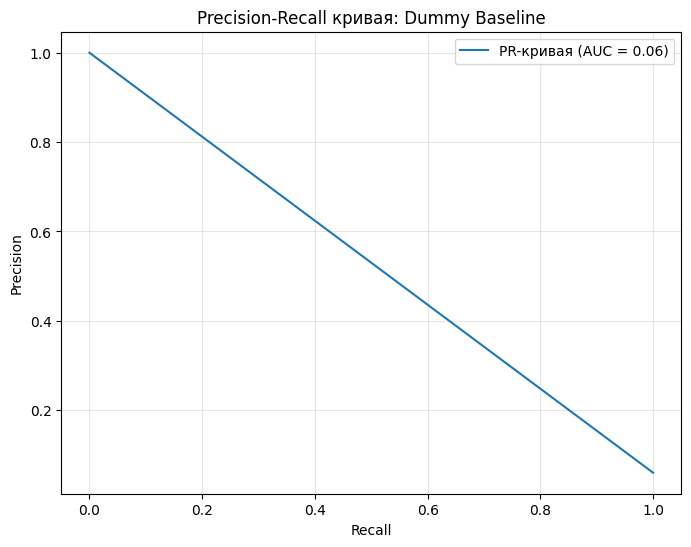

[Dummy Baseline] PR-AUC: 0.0600


In [51]:
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
evaluate_model(baseline, X_train_val, y_train_val, cv, name="Dummy Baseline")

---

<a id='22-bullet'></a>

Создание базовой модели без новых признаов

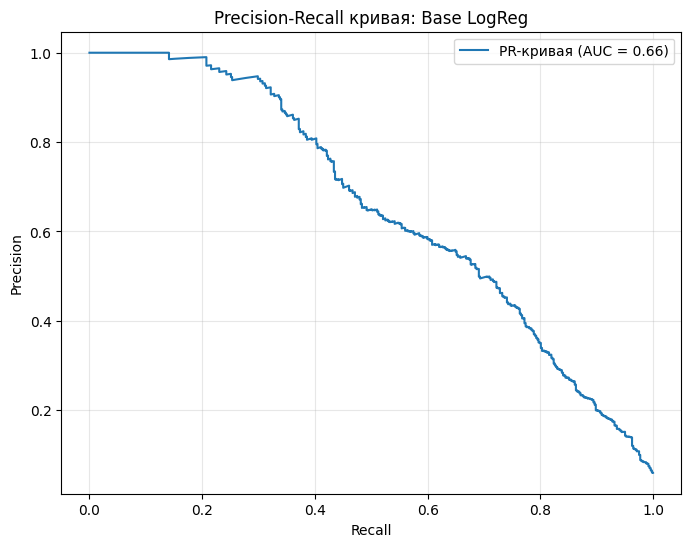

[Base LogReg] PR-AUC: 0.6575
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
num__app_crashes_last_month,2.373821,2.373821
target__0,2.012517,2.012517
cat_none__subscription_status_pro,1.115674,1.115674
num__missingindicator_app_crashes_last_month,1.045327,1.045327
num__order_frequency_month,0.604397,0.604397


Топ-5 наименее влиятельных признаков


,importance,abs_importance
inverse__missingindicator_days_since_last_order,-0.021865,0.021865
num__missingindicator_discount_usage_rate,-0.016563,0.016563
num__missingindicator_coffee_preference_change,-0.014845,0.014845
ohe__seasons_summer,0.008559,0.008559
num__coffee_preference_change,0.002284,0.002284


In [52]:
base_pipe = build_pipeline(config)
evaluate_model(base_pipe, X_train_val, y_train_val, cv, name="Base LogReg")

---

<a id='23-bullet'></a>

Проверка модели без обработки пропусков

Размер обучающей выборки: (2115, 22)
Размер тестовой выборки: (529, 22)
Доля положительного класса в train: 0.059
Доля положительного класса в test: 0.059


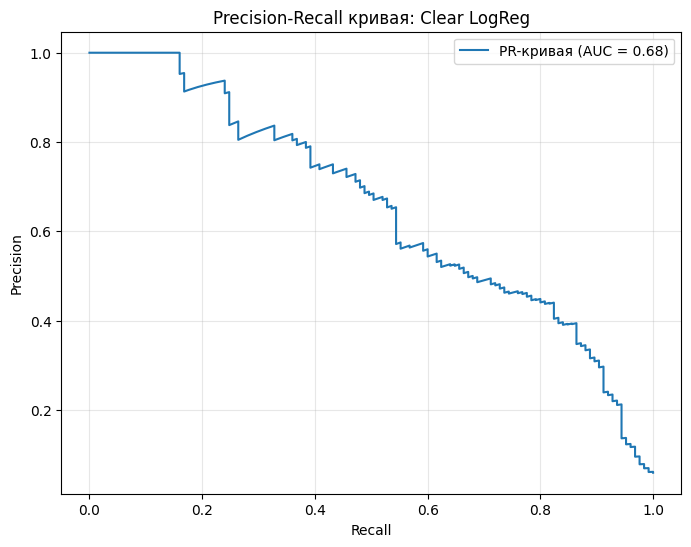

[Clear LogReg] PR-AUC: 0.6766
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
num__app_crashes_last_month,2.491379,2.491379
cat_none__subscription_status_pro,1.075389,1.075389
cat_none__milk_preference_none,-0.942620,0.942620
num__order_frequency_month,0.828088,0.828088
inverse__days_since_last_promo,-0.701226,0.701226


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__notifications_enabled,-0.043830,0.043830
num__coffee_preference_change,0.030932,0.030932
cat_none__subscription_status_none,-0.029574,0.029574
ohe__coffee_bean_origin_kenya,-0.025375,0.025375
cat_none__milk_preference_oat,-0.006616,0.006616


In [53]:
clear_df = df.dropna()

clear_X_train_val, _, clear_y_train_val, _ = split_df(clear_df)
evaluate_model(base_pipe, clear_X_train_val, clear_y_train_val, cv, name="Clear LogReg")

Удаление строк с пропусками дало мнимое улучшение метрик (AUC 0.67), но сделало модель непригодной для реальной эксплуатации. Потеря 75% данных создала систематическую ошибку: модель обучилась только на идеальных клиентах, игнорируя большинство реальных пользователей. Рваный график PR-кривой подтверждает нестабильность решения: модель запомнила частные случаи малой выборки вместо выявления общих закономерностей. Такой подход для обучения не подойдёт.

---

<a id='24-bullet'></a>

Проверка гипотезы:
- Смотря на результаты матрицы корреляций, можно выделить самый влиятельный признак всего датасета с большим отрывом - app_crashes_last_month.

Тут могут быть два варианта такого исхода:

1. Действительно, признак оказывается сильное влияние на целевую переменную и его вес в функции должен быть больше всех остальных.

2. Существует вероятность того, что этот признак подглядывает в будущее или является частью определения целевой переменной. 
    
    - Для проверки второй гипотезы можно провести 2 эксперимента:
        
        1. Полностью исключить app_crashes_last_month, возможно, модель сможет лучше понимать закономерность, а не слепо следовать одному параметру.
        
        2. Попытка превратить числовой признак в категориальный и посмотреть на результаты анализа. Есть предположение, что пользователь не терпит зависаний приложений и уходит по этой причине, тогда стоит разделить признак на 3 категории: 0 багов - всё стабильно, 1-2 сбоя, 3+ - много сбоев, что ведёт к оттоку клиентов.

Размер обучающей выборки: (8028, 21)
Размер тестовой выборки: (2008, 21)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


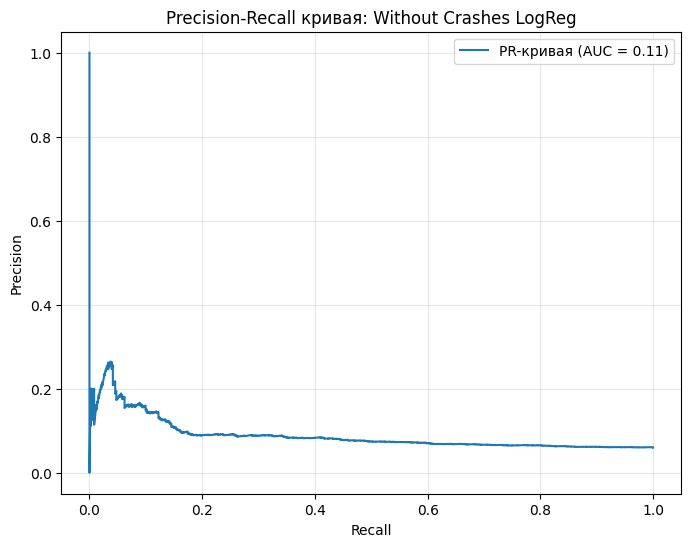

[Without Crashes LogReg] PR-AUC: 0.1115
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
target__0,3.385540,3.385540
cat_none__subscription_status_pro,0.697045,0.697045
ohe__last_drink_size_nan,0.457827,0.457827
ohe__phone_type_nan,-0.384290,0.384290
num__order_frequency_month,0.317828,0.317828


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__missingindicator_total_spent_last_month,0.009928,0.009928
num__seasonal_menu_tried,-0.008680,0.008680
review__missingindicator_review_rating_last_10,0.007845,0.007845
num__missingindicator_coffee_preference_change,0.005672,0.005672
num__missingindicator_app_opens_per_week,0.002358,0.002358


In [54]:
df_without_crashes = df.drop(columns=['app_crashes_last_month'])

without_crashes_config = replace(
    config,
    numeric=get_num_cols(df_without_crashes),
    categorical=get_cat_cols(df_without_crashes),
)
without_crashes_pipe = build_pipeline(without_crashes_config)

X_train_val_w_c, _, y_train_val_w_c, _ = split_df(df_without_crashes)
evaluate_model(without_crashes_pipe, X_train_val_w_c, y_train_val_w_c, cv, name="Without Crashes LogReg")

Модель показала результат хуже. Значит идея не сработала

Попытка сделать из app_crashes_last_month категориальный параметр

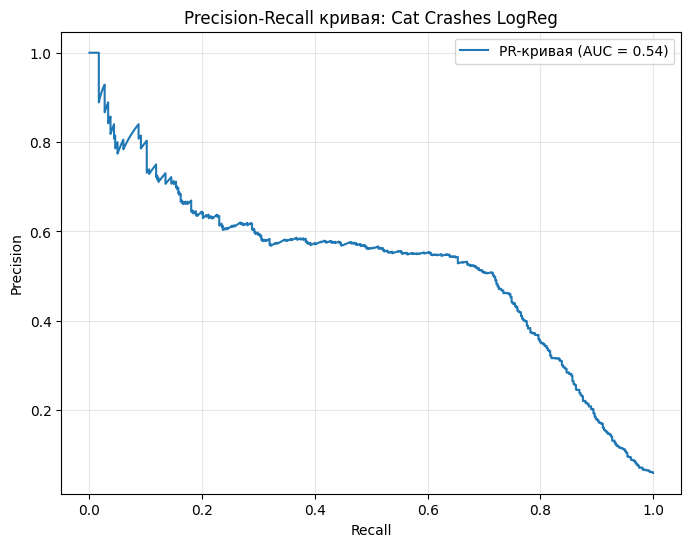

[Cat Crashes LogReg] PR-AUC: 0.5388
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
crashes__x0_cat_zero,-4.839006,4.839006
crashes__x0_cat_low,-3.252020,3.252020
target__0,2.204641,2.204641
cat_none__subscription_status_pro,0.988940,0.988940
ohe__last_coffee_type_nan,0.675346,0.675346


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__missingindicator_discount_usage_rate,0.022194,0.022194
num__notifications_enabled,-0.020790,0.020790
ohe__coffee_bean_origin_colombia,-0.013370,0.013370
num__missingindicator_app_opens_per_week,0.011979,0.011979
num__missingindicator_total_spent_last_month,0.002563,0.002563


In [55]:
crashes_cat_config = replace(
    config,
    crashes_cols=['app_crashes_last_month']
)

crashes_cat_pipe = build_pipeline(crashes_cat_config)
evaluate_model(crashes_cat_pipe, X_train_val, y_train_val, cv, name="Cat Crashes LogReg")

Результат модели оказался хуже, чем на данных без преобразований, значит признак нужно оставить как есть

---

<a id='25-bullet'></a>

Попытка удаления признаков, которые не коррелируют с целевой переменной

FeatureConfig(numeric=Index(['order_frequency_month', 'total_spent_last_month',
       'discount_usage_rate', 'app_opens_per_week', 'review_rating_last_10',
       'app_crashes_last_month'],
      dtype='object'), categorical=Index(['last_coffee_type', 'subscription_status', 'geo_location'], dtype='object'), days_since=[], reviews=['review_rating_last_10'], cat_with_none=['subscription_status'], cat_target_cols=['geo_location'], crashes_cols=[], log_cols=[], sq_cols=[], interaction_pairs=[])
Размер обучающей выборки: (8028, 9)
Размер тестовой выборки: (2008, 9)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


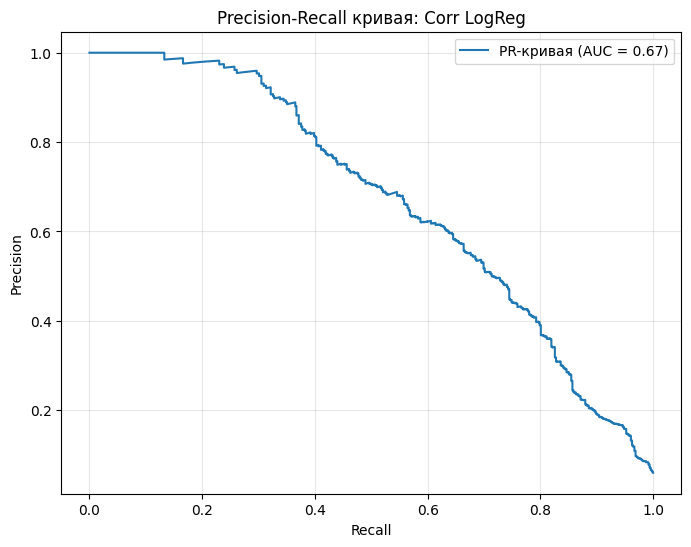

[Corr LogReg] PR-AUC: 0.6747
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
num__app_crashes_last_month,2.327435,2.327435
target__0,1.993097,1.993097
cat_none__subscription_status_pro,1.085896,1.085896
num__missingindicator_app_crashes_last_month,1.037074,1.037074
num__order_frequency_month,0.573610,0.573610


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__discount_usage_rate,-0.034115,0.034115
num__missingindicator_app_opens_per_week,0.027540,0.027540
cat_none__subscription_status_none,0.024097,0.024097
num__missingindicator_total_spent_last_month,-0.017924,0.017924
num__missingindicator_discount_usage_rate,-0.004604,0.004604


In [56]:
corr_df = df.drop(columns=[
    'days_since_last_order', 
    'coffee_preference_change',
    'days_since_last_promo',
    'seasons',
    'median_order_value',
    'review_rating_last_1',
    'notifications_enabled',
    'preferred_roast',
    'milk_preference',
    'last_drink_size',
    'coffee_bean_origin',
    'seasonal_menu_tried',
    'phone_type'
])

corr_config = FeatureConfig(
    numeric=get_num_cols(corr_df),
    categorical=get_cat_cols(corr_df),
    reviews=['review_rating_last_10'],
    cat_with_none=['subscription_status'],
    cat_target_cols=cat_target_cols
)
print(corr_config)
corr_pipe = build_pipeline(corr_config)

corr_X_train_val, _, corr_y_train_val, _ = split_df(corr_df)
evaluate_model(corr_pipe, corr_X_train_val, corr_y_train_val, cv, name="Corr LogReg")

---

<a id='26-bullet'></a>

Вывод: 

1. Результа базовой модели с обработанными признаками: [Base LogReg] PR-AUC: 0.6562

2. Модель без обработки пропусков показала по метрикам результат чуть лучше, но на деле обучилась лишь на 25% идеальных данных, что в реальных условиях проверки сильно ухудшит модель.

3. Обработка сильного признака app_crashes_last_month не приводит к улучшению метрики. Параметр в финальной модели останется таким же.

4. Удаление некоррелируемых признаков действительно привел к улучшению модели ([Corr LogReg] PR-AUC: 0.6745), но как было сказано в блоке корреляций, итоговое удаление колонок будет после попытки создания таких новых признаков, которые смогут быть полезны модели для предсказания целевой переменной



## Этап 5. Создание новых признаков

<a id='27-bullet'></a>

Синтезирование новых признаков

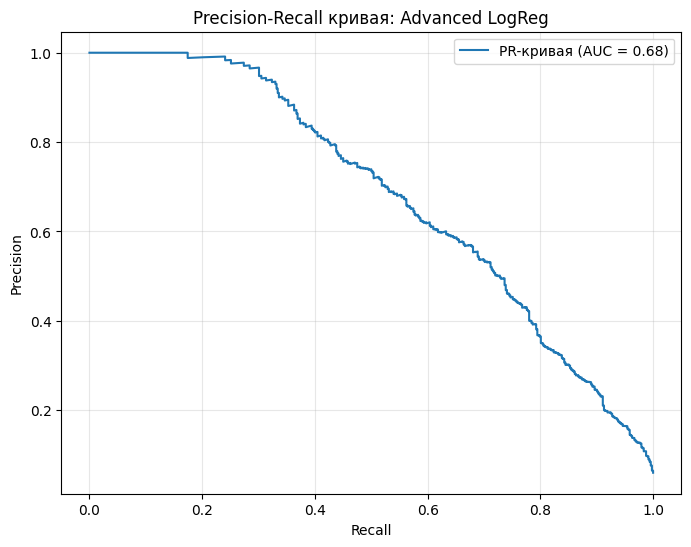

[Advanced LogReg] PR-AUC: 0.6841
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
sq__app_crashes_last_month,1.959901,1.959901
target__0,1.902986,1.902986
log__app_opens_per_week,1.105178,1.105178
cat_none__subscription_status_pro,0.968534,0.968534
log__missingindicator_app_opens_per_week,0.827249,0.827249


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__missingindicator_discount_usage_rate,-0.018074,0.018074
ohe__seasons_winter,0.012882,0.012882
ohe__coffee_bean_origin_colombia,-0.010497,0.010497
num__notifications_enabled,-0.005412,0.005412
num__coffee_preference_change,0.003983,0.003983


In [57]:
advanced_config = replace(
    config,
    log_cols=['total_spent_last_month', 'app_opens_per_week', 'median_order_value'],
    sq_cols=['app_crashes_last_month'],
    interaction_pairs=[('subscription_status', 'last_drink_size'), ('seasons', 'last_drink_size')]
)

advanced_pipe = build_pipeline(advanced_config, use_interactions=True)
evaluate_model(advanced_pipe, X_train_val, y_train_val, cv, name="Advanced LogReg")

---

<a id='28-bullet'></a>

Итоговая модель, объединяющая подходы предыдущих лучших попыток

1. Удаление некоррелируемых признаков.

2. Удаление признака по результатам вывода значимости весов.

3. Создание новых признаков.

Размер обучающей выборки: (8028, 10)
Размер тестовой выборки: (2008, 10)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


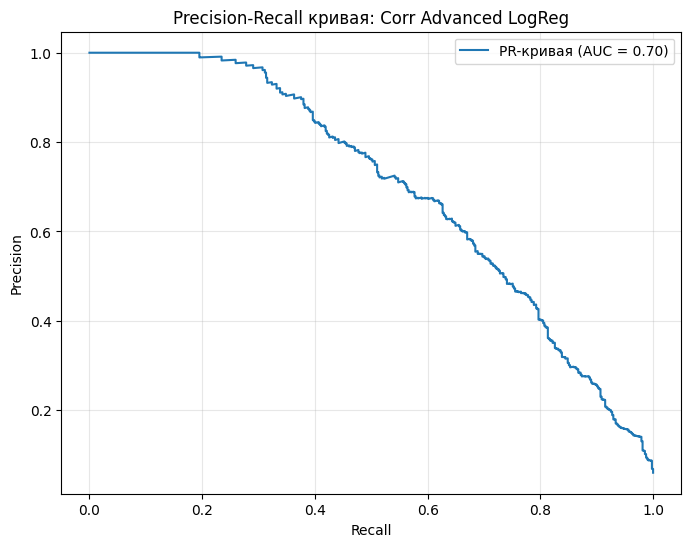

[Corr Advanced LogReg] PR-AUC: 0.7006
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
sq__app_crashes_last_month,1.921655,1.921655
target__0,1.843417,1.843417
log__app_opens_per_week,1.058417,1.058417
cat_none__subscription_status_pro,0.946782,0.946782
log__missingindicator_app_opens_per_week,0.787505,0.787505


Топ-5 наименее влиятельных признаков


,importance,abs_importance
review__missingindicator_review_rating_last_10,0.065373,0.065373
ohe__last_drink_size_small,0.053825,0.053825
ohe__seasons_winter,-0.013288,0.013288
ohe__seasons_summer,-0.009399,0.009399
ohe__last_coffee_type_blend,-0.001377,0.001377


In [58]:
corr_ad_df = df.drop(columns=[
    # Удаление признаков по матрице корреляций
    'days_since_last_order', 
    'coffee_preference_change',
    'days_since_last_promo',
    'median_order_value',
    'review_rating_last_1',
    'notifications_enabled',
    'preferred_roast',
    'milk_preference',
    'coffee_bean_origin',
    'seasonal_menu_tried',
    'phone_type',
    
    # Удаление признака по результатам вывода значимости весов
    'discount_usage_rate'
])

corr_ad_config = FeatureConfig(
    numeric=get_num_cols(corr_ad_df),
    categorical=get_cat_cols(corr_ad_df),
    cat_target_cols=cat_target_cols,
    reviews=['review_rating_last_10'],
    cat_with_none=['subscription_status'],
    log_cols=['total_spent_last_month', 'app_opens_per_week'],
    sq_cols=['app_crashes_last_month'],
    interaction_pairs=[('subscription_status', 'last_drink_size'), ('seasons', 'last_drink_size')]
)
corr_advanced_pipe = build_pipeline(corr_ad_config, use_interactions=True)

corr_ad_X_train_val, _, corr_ad_y_train_val, _ = split_df(corr_ad_df)
evaluate_model(corr_advanced_pipe, corr_ad_X_train_val, corr_ad_y_train_val, cv, name="Corr Advanced LogReg")

discount_usage_rate - удален по результатам вывода значимости весов. Остальные признаки не будут удалены по причине того, что они являются частью более сложного признака, который в своих других вариациях имеет значительный вес.

order_frequency_month - значение, которое в анализе EDA должно было быть прологарифмировано, но при тестировании разных моделей оказалось: если оставить параметр без изменений, то значения кросс-валидации по метрике PR-AUC улучшаться на 0.004, при этом тестовая выборка покажет результат по той же метрике на 0.021 хуже. В результате получается: повысилась точность предсказаний (Precision с 70% до 75%), но ценой снижения покрытия (Recall с 67% до 63%). Это привело к снижению на 8 клиентов ложных тревог, но упущено на 4 уходящих клиента больше. Учитывая, что в задаче важно сделать акцент именно на поиске клиентов, которые могут уйти, значит показатель Recall более важен. Данный показатель логарифмироваться не будет.


## Этап 6. Эксперименты с гиперпараметрами

<a id='29-bullet'></a>

Перебор гиперпараметров через Grid Search Cross Validate

In [59]:
param_grid = [
    {
        'model__solver': ['saga'],
        'model__l1_ratio': [0.0, 0.5, 1.0], 
        'model__C': [0.01, 1, 10],
        'model__max_iter': [4000]
    }
]

grid_search = GridSearchCV(
    estimator=corr_advanced_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='average_precision',
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train_val, y_train_val)

Начинаем подбор гиперпараметров...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'model__C': [0.01, 1, ...], 'model__l1_ratio': [0.0, 0.5, ...], 'model__max_iter': [4000], 'model__solver': ['saga']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'average_precision'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the com

---

<a id='30-bullet'></a>

Вывод топ-5 лучших моделей с их метриками и гиперпараметрами

In [60]:
results_df = pd.DataFrame(grid_search.cv_results_)

columns_to_show = [
    'param_model__l1_ratio', 
    'param_model__C', 
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]

results_table = results_df[columns_to_show].sort_values(by='rank_test_score')
results_table.columns = ['L1 Ratio', 'C', 'PR-AUC', 'Std Dev', 'Ранг']

print("Топ-5 лучших конфигураций:")
print(results_table.head(5))


Топ-5 лучших конфигураций:
   L1 Ratio      C    PR-AUC   Std Dev  Ранг
3       0.0   1.00  0.700142  0.045707     1
4       0.5   1.00  0.699867  0.046085     2
5       1.0   1.00  0.696024  0.045238     3
6       0.0  10.00  0.695620  0.044170     4
0       0.0   0.01  0.694754  0.047716     5


## Этап 7. Подготовка финальной модели


<a id='31-bullet'></a>

In [61]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат валидации (PR-AUC): {grid_search.best_score_:.4f}")

Лучшие параметры: {'model__C': 1, 'model__l1_ratio': 0.0, 'model__max_iter': 4000, 'model__solver': 'saga'}
Лучший результат валидации (PR-AUC): 0.7001


---

<a id='32-bullet'></a>

Функция для визуализации итогового результата

In [62]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor = lines[0].get_color(), alpha=0.2)

In [63]:
def show_learning_curve(best_model, df, y):
    N_train, learn_train, learn_test = learning_curve(
        best_model,
        df,
        y,
        cv=cv,
        shuffle=True,
        random_state=RANDOM_STATE
    )
    plot_with_err(N_train, learn_train, label='training scores')
    plot_with_err(N_train, learn_test, label='validation scores')
    plt.xlabel('Размер датасета')
    plt.ylabel('Метрика')
    plt.legend()
    
    plt.show()

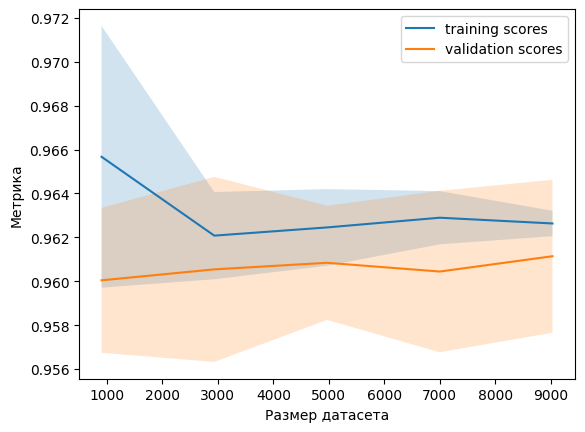

In [71]:
best_model = grid_search.best_estimator_
X = df.drop(columns='churn')
y = df['churn']

show_learning_curve(best_model, X, y)

In [72]:
def final_check(best_model, X_test, y_test, manual_threshold=None):
    y_proba = best_model.predict_proba(X_test)[:, 1]

    score = average_precision_score(y_test, y_proba)
    print(f"PR-AUC: {score:.4f}")
    
    create_PR_curve_graph(y_test, y_proba, score, 'Финальная модель')

    if manual_threshold is not None:
        best_thresh = manual_threshold
        print(f"Используем заданный порог: {best_thresh}")
    else:
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
        
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        
        best_idx = np.argmax(f1_scores[:-1])
        best_thresh = thresholds[best_idx]
        
        print(f"Оптимальный порог: {best_thresh:.4f}")
        print(f"Максимальный F1-score: {f1_scores[best_idx]:.4f}")

    y_pred_custom = (y_proba >= best_thresh).astype(int)

    print("Результаты на тесте с новым порогом")
    print(classification_report(y_test, y_pred_custom))
    
    print("Матрица ошибок")
    print(confusion_matrix(y_test, y_pred_custom))

---

<a id='33-bullet'></a>

Финальная проверка модели на тестовой выборке

PR-AUC: 0.7517


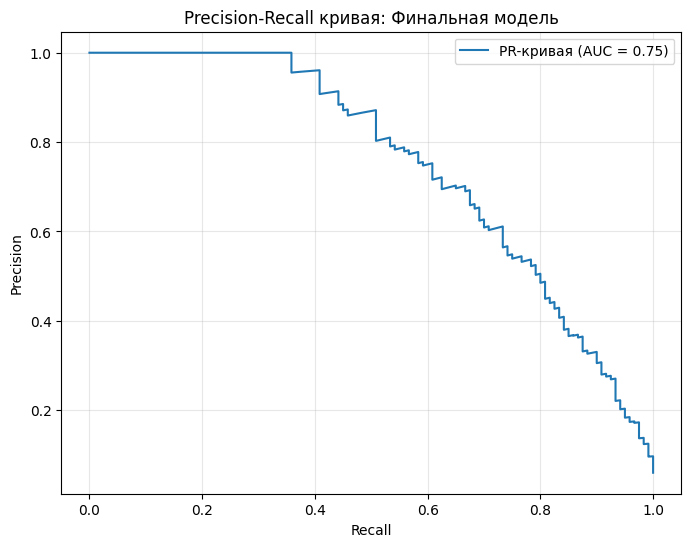

Оптимальный порог: 0.3835
Максимальный F1-score: 0.6838
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1888
         1.0       0.70      0.67      0.68       120

    accuracy                           0.96      2008
   macro avg       0.84      0.82      0.83      2008
weighted avg       0.96      0.96      0.96      2008

Матрица ошибок
[[1854   34]
 [  40   80]]


In [73]:
final_check(best_model, X_test, y_test)

## Этап 8. Отчёт о проделанной работе

<a id='34-bullet'></a>

1. Модель показала высокое качество для несбалансированной выборки: PR-AUC 75%.

2. При оптимальном пороге (0.38) достигнуты Precision 70% и Recall 67%. Это означает, что модель успешно выявляет 68% всех уходящих клиентов. Общая точность (Accuracy) составила 96%. Из 120 ушедших клиентов (6% всего датасета), модель смогла предсказать 80 из них. 

3. Абсолютное доминирующее влияние оказывает признак app_crashes_last_month (корреляция 85%).

- В отличие от маркетинговых метрик (корреляция которых < 0.12), технические сбои приложения являются главным драйвером ухода клиентов. 

- Для улучшения работы модели критически важным оказалось использование логарифмирования тяжелых хвостов распределений, добавление взаимодействий признаков, повышение значимости признака за счет возведения в квадрат.

**Вывод: модель эффективна и готова к использованию для оптимизации бюджета: она позволяет точечно работать с группой риска, минимизируя затраты на лояльных пользователей, коих в базе 94%. При этом бизнесу важно сфокусироваться на работе своего приложения, оно является самым важным фактором, который влияет на решение клиента по уходу к конкуренту.**

## Этап 9. Сохранение модели для продакшена

<a id='35-bullet'></a>

Локальное сохранение модели

In [74]:
file_name = 'customer_churn_prediction.joblib'

metadata = {
    'model_version': '1.0.0',
    'training_date': '2025-12-16',
    'pr_auc': 0.75,
    'python_version': sys.version,
    'sklearn_version': sklearn.__version__,
    'pandas_version': pd.__version__,
    'numpy_version': np.__version__
}

joblib.dump({
    'model': best_model,
    'metadata': metadata
}, file_name)

print(f"Объект сохранён в файл {file_name}") 

Объект сохранён в файл customer_churn_prediction.joblib


{'model_version': '1.0.0', 'training_date': '2025-12-16', 'pr_auc': 0.75, 'python_version': '3.14.0 (main, Oct  7 2025, 09:34:52) [Clang 17.0.0 (clang-1700.0.13.3)]', 'sklearn_version': '1.8.0', 'pandas_version': '2.3.3', 'numpy_version': '2.3.5'} 

PR-AUC: 0.7517


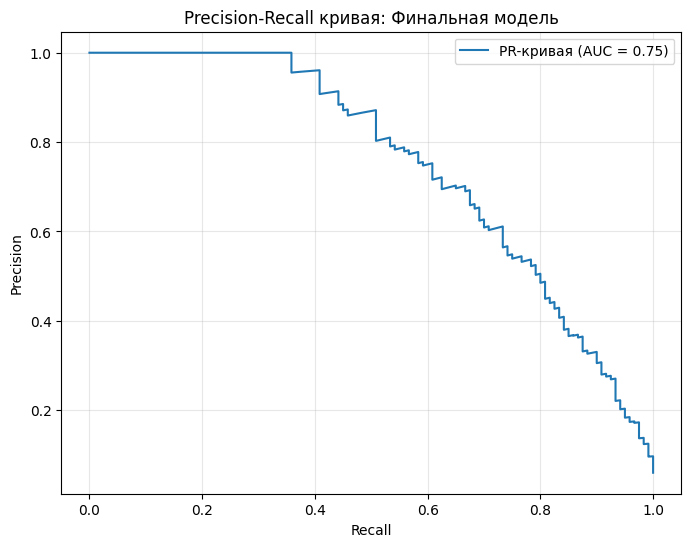

Оптимальный порог: 0.3835
Максимальный F1-score: 0.6838
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1888
         1.0       0.70      0.67      0.68       120

    accuracy                           0.96      2008
   macro avg       0.84      0.82      0.83      2008
weighted avg       0.96      0.96      0.96      2008

Матрица ошибок
[[1854   34]
 [  40   80]]


In [75]:
loaded_data = joblib.load(file_name)

print(loaded_data['metadata'], '\n')
final_check(loaded_data['model'], X_test, y_test)

---

<a id='36-bullet'></a>

Сервис на основе обученной модели

In [76]:
class ChurnModelService:
    def __init__(self, model_path=file_name, threshold=0.3832):
        self.model = joblib.load(model_path)
        self.threshold = threshold
    
    def predict_churn(self, X, num_cols):
        X = clip_negative_value(X, num_cols)
        
        probs = self.model['model'].predict_proba(X)[:, 1]
        predictions = (probs >= self.threshold).astype(int)

        return predictions, probs

---

<a id='37-bullet'></a>

Тестирование модели и сервиса на данных датасета

In [78]:
row_idx = 7
sample = df.iloc[[row_idx]].copy()

test = sample.drop(columns=['churn'])

service = ChurnModelService()
is_churn, risk_score = service.predict_churn(test, num_cols)

print(f"Клиент может уйти: {'Да' if is_churn else 'Нет'}")
print(f'Уверенность в ответе: {round(risk_score[0] * 100, 2)}')

Клиент может уйти: Да
Уверенность в ответе: 69.34


---

<a id='38-bullet'></a>

Ссылка для скачивания сохранённой модели

https://github.com/KatsayArtemDev/ml/blob/main/logistic_regression/churn_prediction/customer_churn_prediction.joblib